### 0. Setup Code

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pointbiserialr, uniform
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, cross_validate, RandomizedSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    f1_score, 
    precision_score, 
    recall_score, 
    average_precision_score, 
    make_scorer, 
    precision_recall_curve, 
    classification_report
)
from sklearn.inspection import permutation_importance

### 1. Get the Data

In [6]:
# Function to load the dataset from a specified file path
def load_dataset(file_path):
    try:
        # Read the CSV file with ';' as the separator
        df = pd.read_csv(r"/Users/yichenhe/Desktop/MSIN0097 Predictive Analytics/Individual/Dataset/bank+marketing/bank/bank-full.csv", sep=";")
        print("Dataset loaded successfully!")
        return df
    except Exception as e:
        # Handle any errors that occur during file loading
        print(f"Error loading dataset: {e}")
        return None

# Load the dataset into a DataFrame
bank = load_dataset("your_file.csv")

Dataset loaded successfully!


### 2. Explore the data 

### 2.1 Check the basic information of the data.

In [10]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
# Check the data structure - display data types and missing values.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
print(bank.shape)

(45211, 17)


In [16]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 2.2 Studying each attribute

### 2.2.1 Numerical attributes

<Axes: xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of age')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='age'>

Text(0.5, 1.0, 'Boxplot of age')

Text(0.5, 0, '')

<Axes: xlabel='balance', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of balance')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='balance'>

Text(0.5, 1.0, 'Boxplot of balance')

Text(0.5, 0, '')

<Axes: xlabel='day', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of day')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='day'>

Text(0.5, 1.0, 'Boxplot of day')

Text(0.5, 0, '')

<Axes: xlabel='duration', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of duration')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='duration'>

Text(0.5, 1.0, 'Boxplot of duration')

Text(0.5, 0, '')

<Axes: xlabel='campaign', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of campaign')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='campaign'>

Text(0.5, 1.0, 'Boxplot of campaign')

Text(0.5, 0, '')

<Axes: xlabel='pdays', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of pdays')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='pdays'>

Text(0.5, 1.0, 'Boxplot of pdays')

Text(0.5, 0, '')

<Axes: xlabel='previous', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of previous')

Text(0.5, 0, '')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='previous'>

Text(0.5, 1.0, 'Boxplot of previous')

Text(0.5, 0, '')

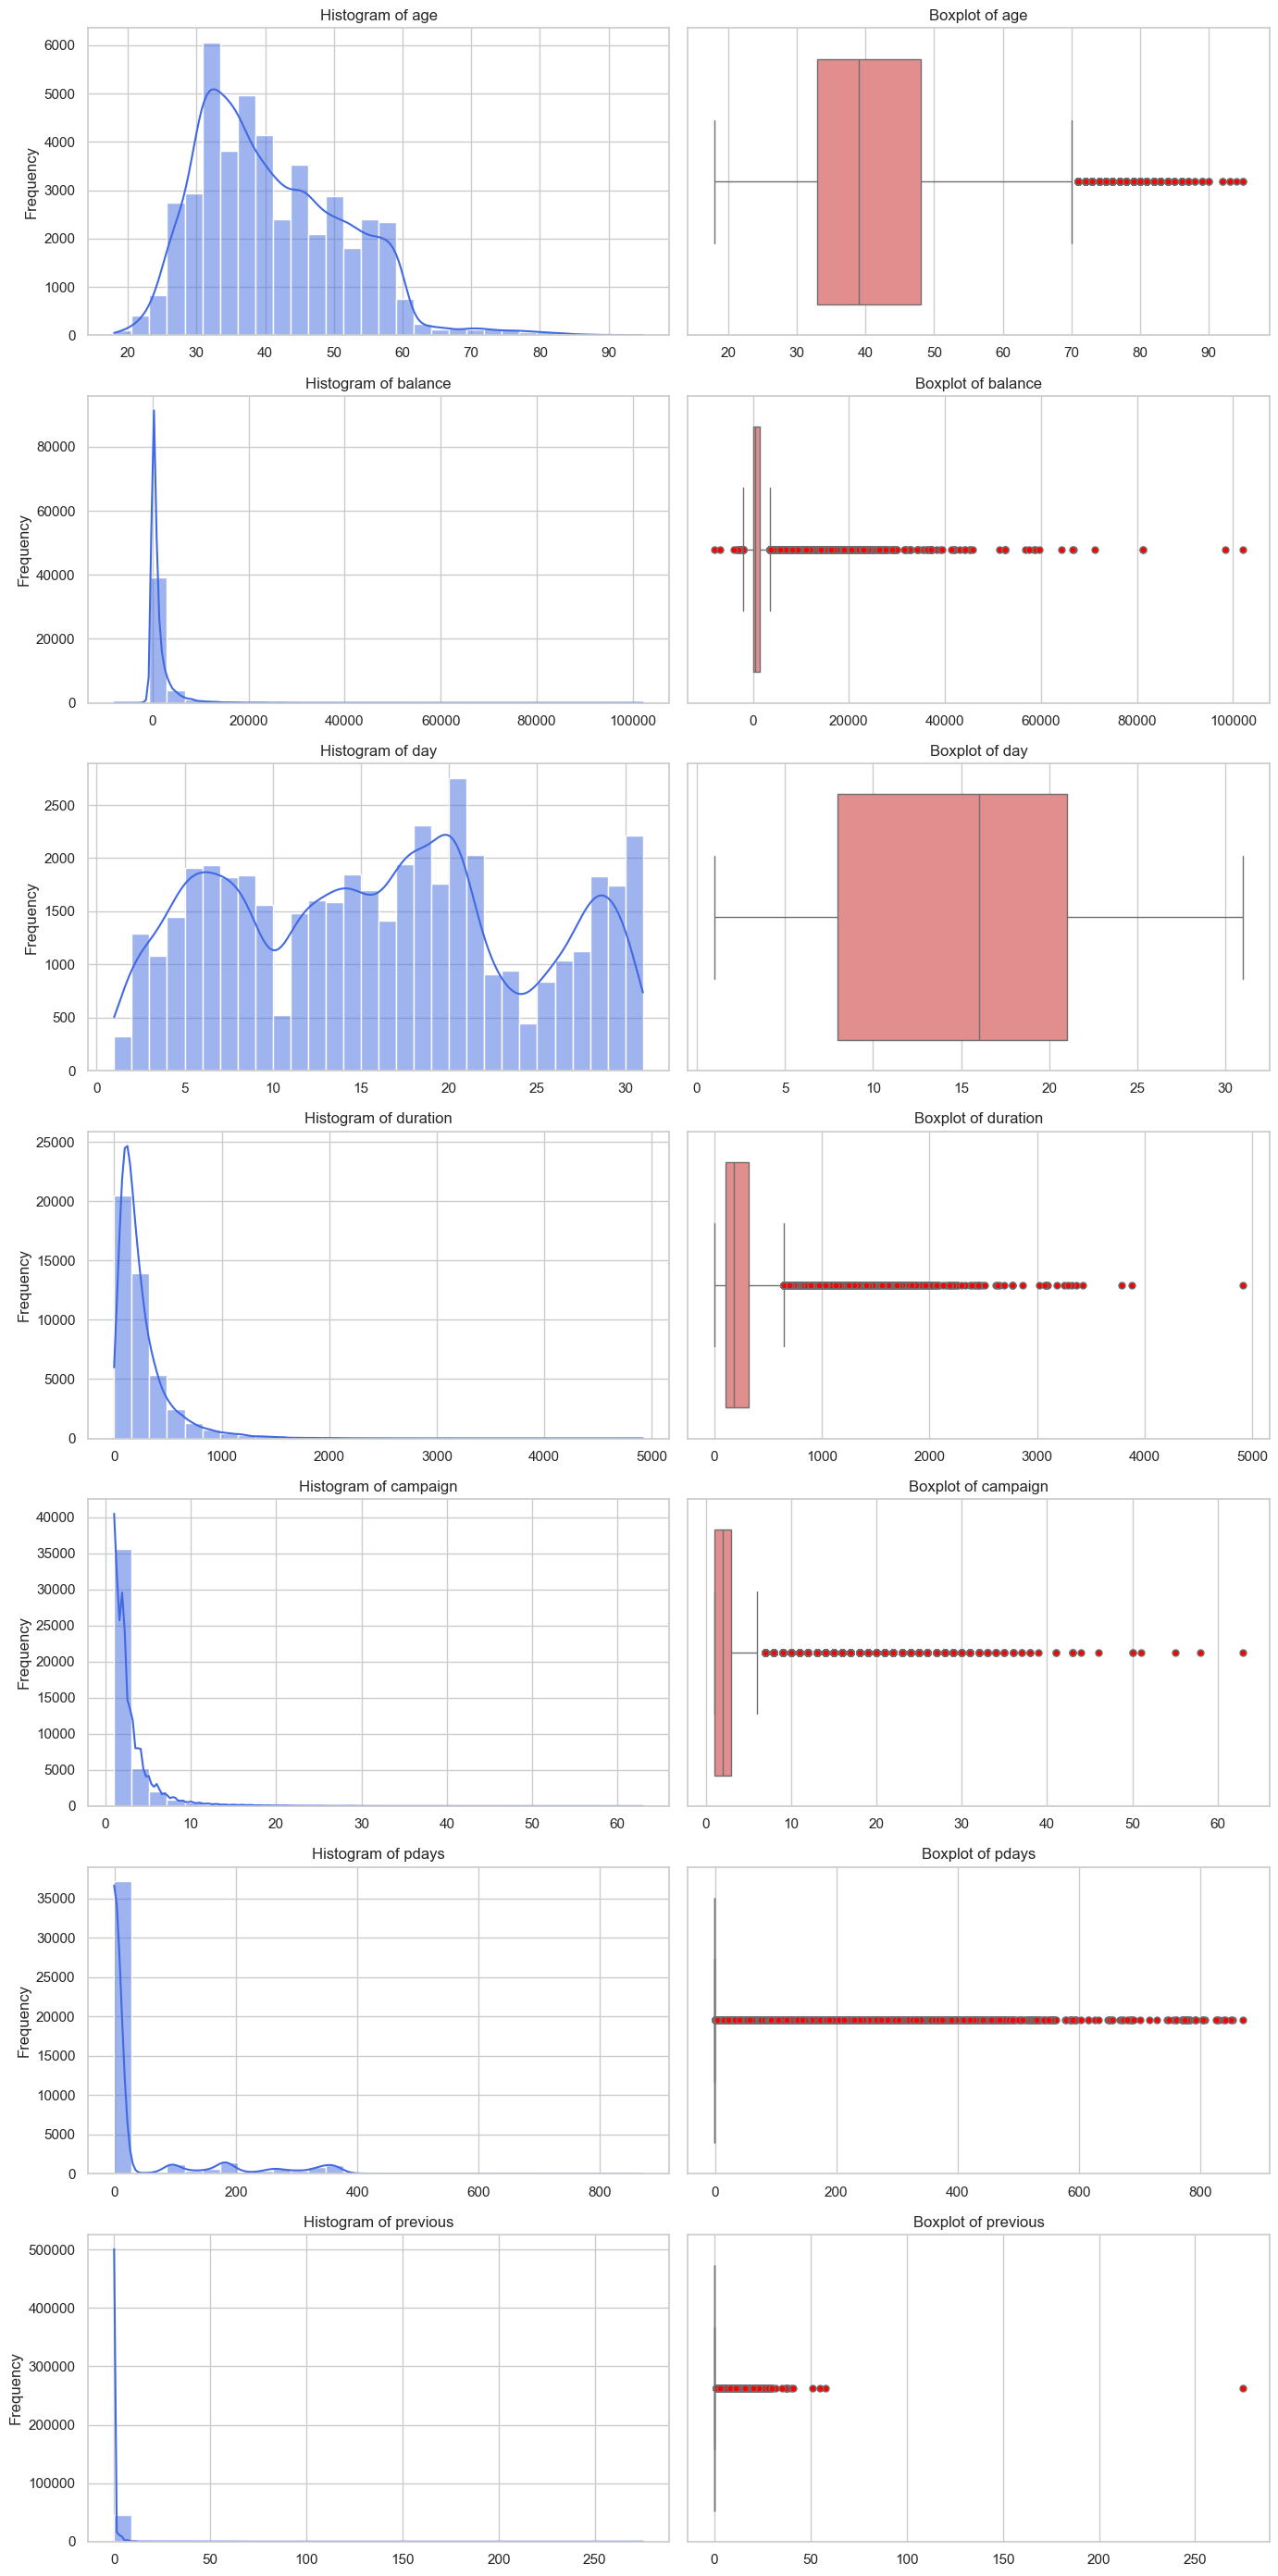

In [20]:
# Apply a modern style
sns.set_theme(style="whitegrid")

# Identify numerical and categorical columns
numeric_cols = bank.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = bank.select_dtypes(include=["object", "category"]).columns

# Numerical Variable Analysis
num_vars = len(numeric_cols)
fig, axes = plt.subplots(num_vars, 2, figsize=(14, num_vars * 4))

for i, col in enumerate(numeric_cols):
    # Histogram
    sns.histplot(bank[col], bins=30, kde=True, ax=axes[i, 0], color="royalblue")
    axes[i, 0].set_title(f"Histogram of {col}", fontsize=12)
    axes[i, 0].set_xlabel("")
    axes[i, 0].set_ylabel("Frequency")

    # Box plot with enhanced aesthetics
    sns.boxplot(x=bank[col], ax=axes[i, 1], color="lightcoral",
                flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5})
    axes[i, 1].set_title(f"Boxplot of {col}", fontsize=12)
    axes[i, 1].set_xlabel("")

plt.tight_layout()
plt.show()


In [21]:
# Process the 'age' variable

# Compute Interquartile Range (IQR)
Q1 = bank["age"].quantile(0.25)  # 25th percentile
Q3 = bank["age"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Calculate IQR

# Compute lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = bank[(bank["age"] < lower_bound) | (bank["age"] > upper_bound)]

# Compute the percentage of outliers
outlier_percentage = len(outliers) / len(bank) * 100

# Print outlier statistics
print(f"Number of outliers: {len(outliers)}")
print(f"Total data points: {len(bank)}")
print(f"Outlier percentage: {outlier_percentage:.2f}%")


Number of outliers: 487
Total data points: 45211
Outlier percentage: 1.08%


Minimum Balance: -8019
   balance  balance_shifted  balance_log
0     2143            10163     9.226509
1       29             8049     8.993303
2        2             8022     8.989943
3     1506             9526     9.161780
4        1             8021     8.989818


<Axes: xlabel='balance', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Original Balance')

Text(0.5, 0, 'Balance')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='balance'>

Text(0.5, 1.0, 'Boxplot of Original Balance')

Text(0.5, 0, 'Balance')

<Axes: xlabel='balance_log', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Log-Transformed Balance')

Text(0.5, 0, 'Log(Balance)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='balance_log'>

Text(0.5, 1.0, 'Boxplot of Log-Transformed Balance')

Text(0.5, 0, 'Log(Balance)')

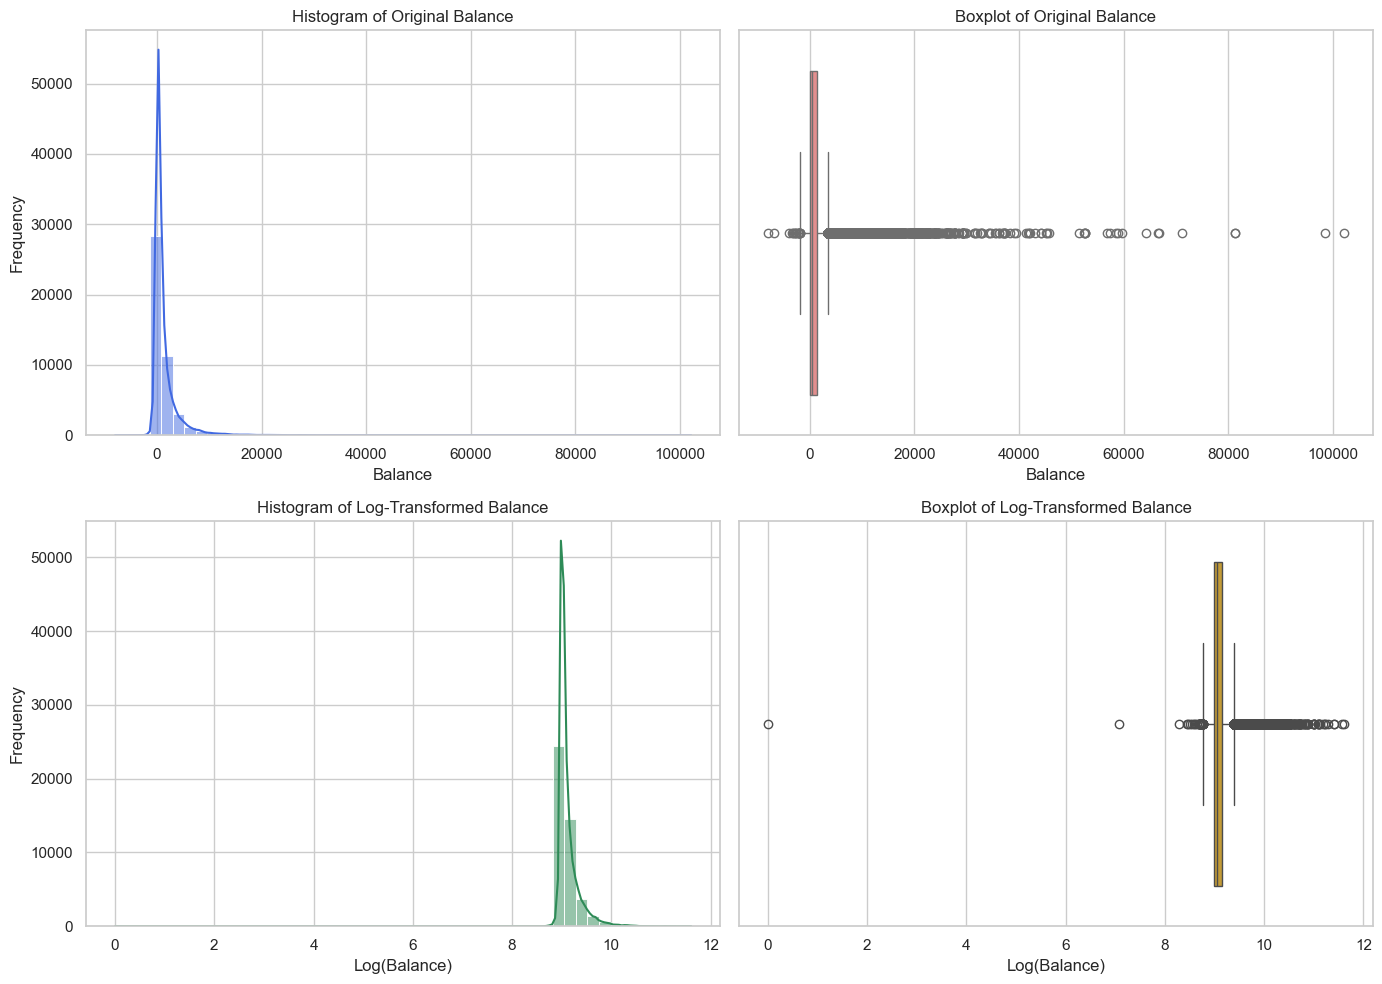

In [22]:
# Process the 'balance' variable

# Find the minimum value of the balance variable
min_balance = bank["balance"].min()
print(f"Minimum Balance: {min_balance}")

# Shift all balance values to ensure non-negative values
bank["balance_shifted"] = bank["balance"] - min_balance + 1

# Apply logarithmic transformation to normalize distribution
bank["balance_log"] = np.log(bank["balance_shifted"])

# Display transformed data
print(bank[["balance", "balance_shifted", "balance_log"]].head())

# Plot histograms and boxplots to compare original and transformed balance distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of original balance
sns.histplot(bank["balance"], bins=50, kde=True, ax=axes[0, 0], color="royalblue")
axes[0, 0].set_title("Histogram of Original Balance")
axes[0, 0].set_xlabel("Balance")
axes[0, 0].set_ylabel("Frequency")

# Boxplot of original balance
sns.boxplot(x=bank["balance"], ax=axes[0, 1], color="lightcoral")
axes[0, 1].set_title("Boxplot of Original Balance")
axes[0, 1].set_xlabel("Balance")

# Histogram of log-transformed balance
sns.histplot(bank["balance_log"], bins=50, kde=True, ax=axes[1, 0], color="seagreen")
axes[1, 0].set_title("Histogram of Log-Transformed Balance")
axes[1, 0].set_xlabel("Log(Balance)")
axes[1, 0].set_ylabel("Frequency")

# Boxplot of log-transformed balance
sns.boxplot(x=bank["balance_log"], ax=axes[1, 1], color="goldenrod")
axes[1, 1].set_title("Boxplot of Log-Transformed Balance")
axes[1, 1].set_xlabel("Log(Balance)")

plt.tight_layout()
plt.show()

In [26]:
# Process outliers of balance_log

# Compute Interquartile Range (IQR)
Q1 = bank["balance_log"].quantile(0.25)  # 25th percentile
Q3 = bank["balance_log"].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1  # Calculate IQR

# Compute lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers based on the defined boundaries
outliers = bank[(bank["balance_log"] < lower_bound) | (bank["balance_log"] > upper_bound)]

# Calculate the percentage of outliers in the dataset
outlier_percentage = len(outliers) / len(bank) * 100

# Print outlier statistics
print(f"Number of outliers: {len(outliers)}")
print(f"Total data points: {len(bank)}")
print(f"Outlier percentage: {outlier_percentage:.2f}%")



Number of outliers: 4072
Total data points: 45211
Outlier percentage: 9.01%


In [28]:
# Compute the 5th and 95th percentiles (Winsorization boundaries)
lower_percentile = bank["balance_log"].quantile(0.05)  # 5th percentile (lower bound)
upper_percentile = bank["balance_log"].quantile(0.95)  # 95th percentile (upper bound)

# Winsorization: Limit balance_log values within the 5th and 95th percentiles
bank["balance_log_winsorized"] = np.clip(bank["balance_log"], lower_percentile, upper_percentile)

# Print the Winsorization boundaries
print(f"5th percentile (lower bound): {lower_percentile:.2f}")
print(f"95th percentile (upper bound): {upper_percentile:.2f}")

5th percentile (lower bound): 8.97
95th percentile (upper bound): 9.53


<Axes: xlabel='balance_log_winsorized', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Log-Transformed Balance (After Winsorization)')

Text(0.5, 0, 'Log(Balance)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='balance_log_winsorized'>

Text(0.5, 1.0, 'Boxplot of Log-Transformed Balance (After Winsorization)')

Text(0.5, 0, 'Log(Balance)')

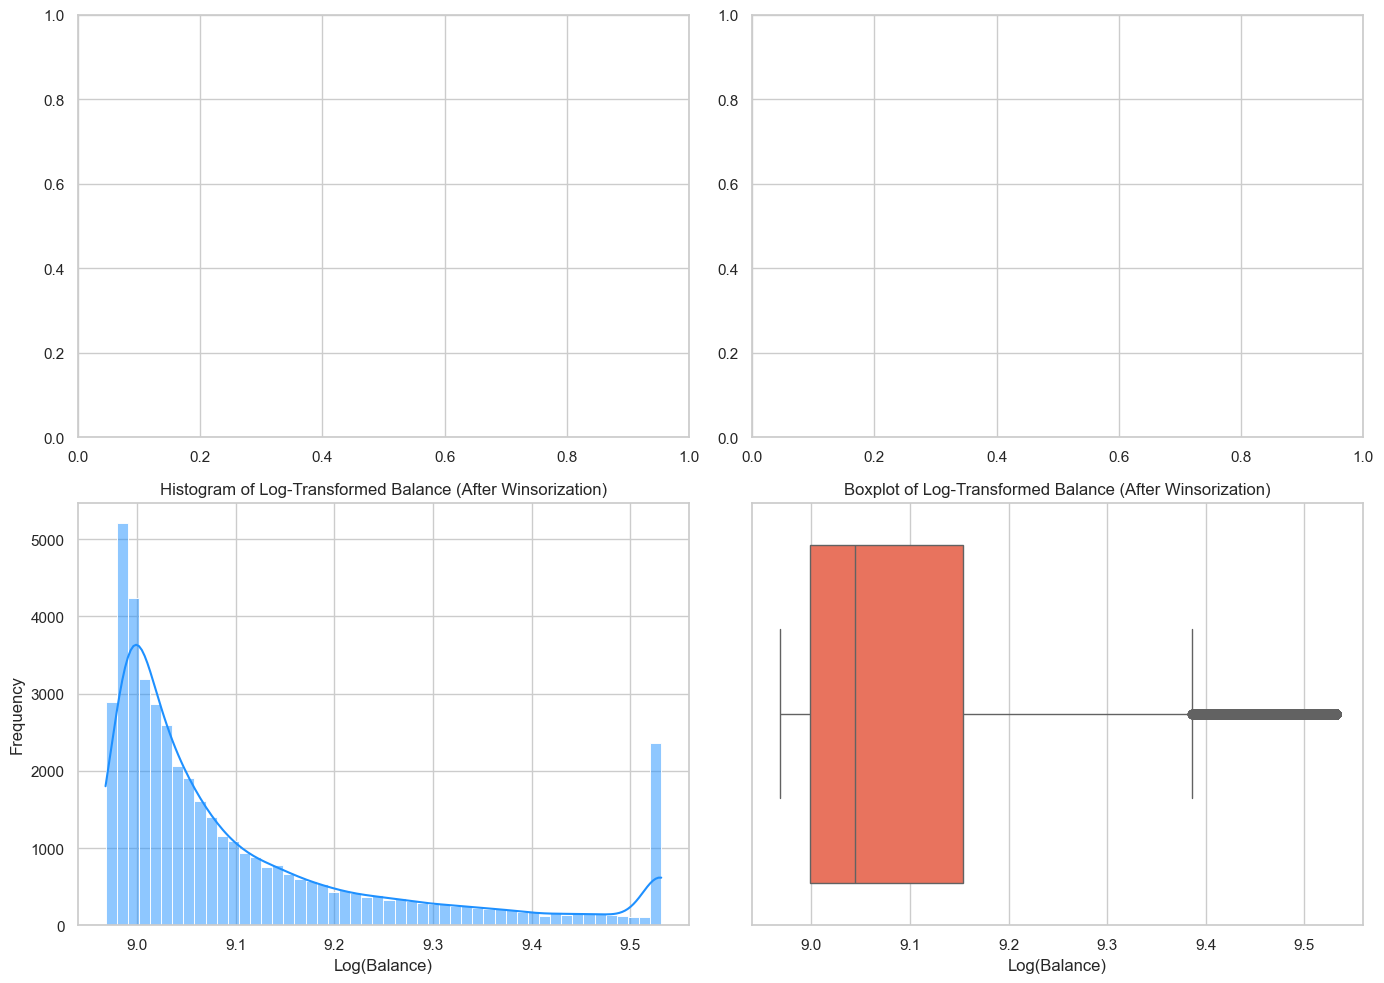

In [30]:
# Create a 2x2 subplot layout for visualizing the distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of log-transformed balance after Winsorization
sns.histplot(bank["balance_log_winsorized"], bins=50, kde=True, ax=axes[1, 0], color="dodgerblue")
axes[1, 0].set_title("Histogram of Log-Transformed Balance (After Winsorization)")
axes[1, 0].set_xlabel("Log(Balance)")
axes[1, 0].set_ylabel("Frequency")

# Boxplot of log-transformed balance after Winsorization
sns.boxplot(x=bank["balance_log_winsorized"], ax=axes[1, 1], color="tomato")
axes[1, 1].set_title("Boxplot of Log-Transformed Balance (After Winsorization)")
axes[1, 1].set_xlabel("Log(Balance)")

# Adjust layout for better readability
plt.tight_layout()
plt.show()

<Axes: xlabel='duration_log', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Log-Transformed Duration')

Text(0.5, 0, 'Log(Duration)')

Text(0, 0.5, 'Frequency')

<Axes: xlabel='duration_log'>

Text(0.5, 1.0, 'Boxplot of Log-Transformed Duration')

Text(0.5, 0, 'Log(Duration)')

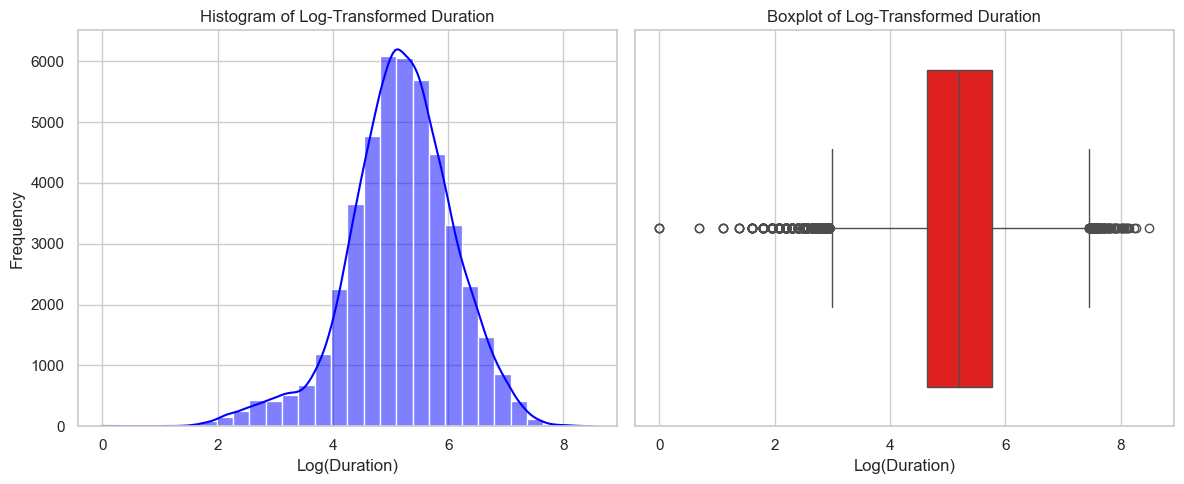

In [32]:
# Process the 'duration' variable
# Apply log transformation to 'duration' to reduce skewness
bank["duration_log"] = np.log1p(bank["duration"])  # log1p(x) = log(1 + x), handling zero values safely

# Create a figure with two subplots for visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of log-transformed duration
sns.histplot(bank["duration_log"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histogram of Log-Transformed Duration")
axes[0].set_xlabel("Log(Duration)")
axes[0].set_ylabel("Frequency")

# Boxplot of log-transformed duration
sns.boxplot(x=bank["duration_log"], ax=axes[1], color="red")
axes[1].set_title("Boxplot of Log-Transformed Duration")
axes[1].set_xlabel("Log(Duration)")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

campaign_bucket
1-2 times    30049
3-5 times    10807
6+ times      4355
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='campaign_bucket', ylabel='count'>

Text(0.5, 0, 'Campaign Contact Frequency')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Campaign Contact Frequency (Binned)')

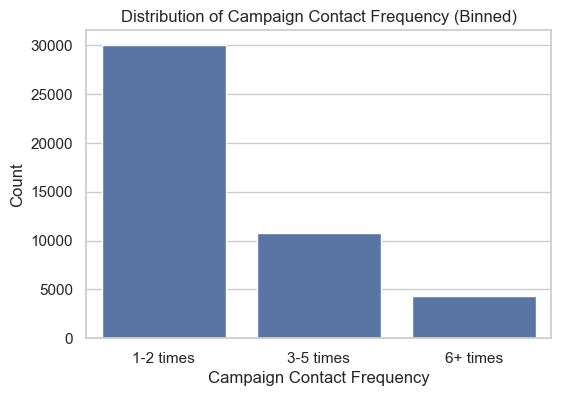

In [33]:
# Process the 'campaign' variable
import pandas as pd

# Define binning rules for categorizing campaign contact frequency
bins = [0, 2, 5, float('inf')]  # Define bin edges
labels = ["1-2 times", "3-5 times", "6+ times"]  # Define category labels

# Apply binning to categorize campaign contact frequency
bank["campaign_bucket"] = pd.cut(bank["campaign"], bins=bins, labels=labels, right=True)

# Display the distribution of the newly created categorical variable
print(bank["campaign_bucket"].value_counts())

# Visualize the distribution of binned campaign contact frequency
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=bank["campaign_bucket"], order=labels)
plt.xlabel("Campaign Contact Frequency")
plt.ylabel("Count")
plt.title("Distribution of Campaign Contact Frequency (Binned)")
plt.show()

Unique values in previous_binary:
 ['no' 'yes']
Pdays Contact Delay Distribution:
 pdays_bucket
Not Contacted          36954
Short Delay (1-200)     4303
Long Delay (>200)       3954
Name: count, dtype: int64

Previous Contact Distribution:
 previous_binary
no     36954
yes     8257
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

<Axes: xlabel='pdays_bucket', ylabel='count'>

Text(0.5, 0, 'Pdays Contact Delay')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Pdays Contact Delay (Binned)')

([0, 1, 2],
 [Text(0, 0, 'Not Contacted'),
  Text(1, 0, 'Short Delay (1-200)'),
  Text(2, 0, 'Long Delay (>200)')])

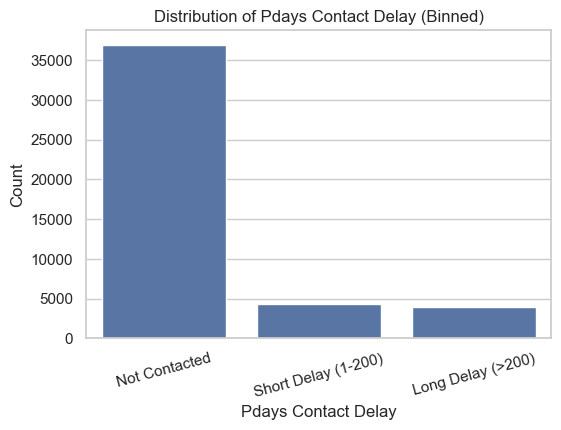

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='previous_binary', ylabel='count'>

Text(0.5, 0, 'Previous Contact')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Distribution of Previous Contact (Binary)')

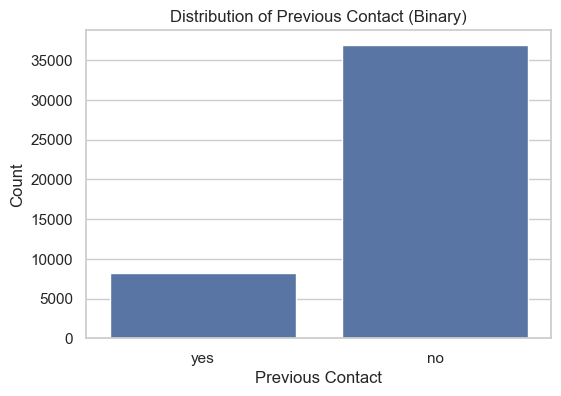

In [36]:
# Process 'previous' and 'pdays' variables

# Binarize the 'previous' variable (0 vs. >0) into "yes" and "no"
bank["previous_binary"] = bank["previous"].apply(lambda x: "yes" if x > 0 else "no")

# Check unique values after transformation
print("Unique values in previous_binary:\n", bank["previous_binary"].unique())

# Define binning rules for 'pdays'
pdays_bins = [-2, -0.5, 200, float('inf')]  # Adjusting boundaries (-2 ensures -1 is categorized as "Not Contacted")
pdays_labels = ["Not Contacted", "Short Delay (1-200)", "Long Delay (>200)"]  # Define category labels
bank["pdays_bucket"] = pd.cut(bank["pdays"], bins=pdays_bins, labels=pdays_labels, right=True)

# Display the distribution of 'pdays_bucket' and 'previous_binary'
print("Pdays Contact Delay Distribution:\n", bank["pdays_bucket"].value_counts())
print("\nPrevious Contact Distribution:\n", bank["previous_binary"].value_counts())

# Visualize 'pdays_bucket' distribution
plt.figure(figsize=(6,4))
sns.countplot(x=bank["pdays_bucket"], order=pdays_labels)
plt.xlabel("Pdays Contact Delay")
plt.ylabel("Count")
plt.title("Distribution of Pdays Contact Delay (Binned)")
plt.xticks(rotation=15)
plt.show()

# Visualize 'previous_binary' distribution
plt.figure(figsize=(6,4))
sns.countplot(x=bank["previous_binary"], order=["yes", "no"])
plt.xlabel("Previous Contact")
plt.ylabel("Count")
plt.title("Distribution of Previous Contact (Binary)")
plt.show()

In [38]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,y,balance_shifted,balance_log,balance_log_winsorized,duration_log,campaign_bucket,previous_binary,pdays_bucket
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,10163,9.226509,9.226509,5.568345,1-2 times,no,Not Contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,8049,8.993303,8.993303,5.023881,1-2 times,no,Not Contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,8022,8.989943,8.989943,4.343805,1-2 times,no,Not Contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,9526,9.161780,9.161780,4.532599,1-2 times,no,Not Contacted
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,8021,8.989818,8.989818,5.293305,1-2 times,no,Not Contacted


In [40]:
# Remove unnecessary columns: 'balance_shifted', 'balance_log', 'balance', 'duration', 'previous', 'campaign', 'pdays'
bank = bank.drop(columns=["balance_shifted", "balance_log", "balance", "duration", "previous", "campaign", "pdays"])

# Verify that the columns have been successfully removed
bank.head()

,age,job,marital,education,default,housing,loan,contact,day,month,poutcome,y,balance_log_winsorized,duration_log,campaign_bucket,previous_binary,pdays_bucket
0,58,management,married,tertiary,no,yes,no,unknown,5,may,unknown,no,9.226509,5.568345,1-2 times,no,Not Contacted
1,44,technician,single,secondary,no,yes,no,unknown,5,may,unknown,no,8.993303,5.023881,1-2 times,no,Not Contacted
2,33,entrepreneur,married,secondary,no,yes,yes,unknown,5,may,unknown,no,8.989943,4.343805,1-2 times,no,Not Contacted
3,47,blue-collar,married,unknown,no,yes,no,unknown,5,may,unknown,no,9.161780,4.532599,1-2 times,no,Not Contacted
4,33,unknown,single,unknown,no,no,no,unknown,5,may,unknown,no,8.989818,5.293305,1-2 times,no,Not Contacted


### 2.2.2 Categorical attributes

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='job'>

Text(0.5, 1.0, 'Category Frequency of job')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'job')

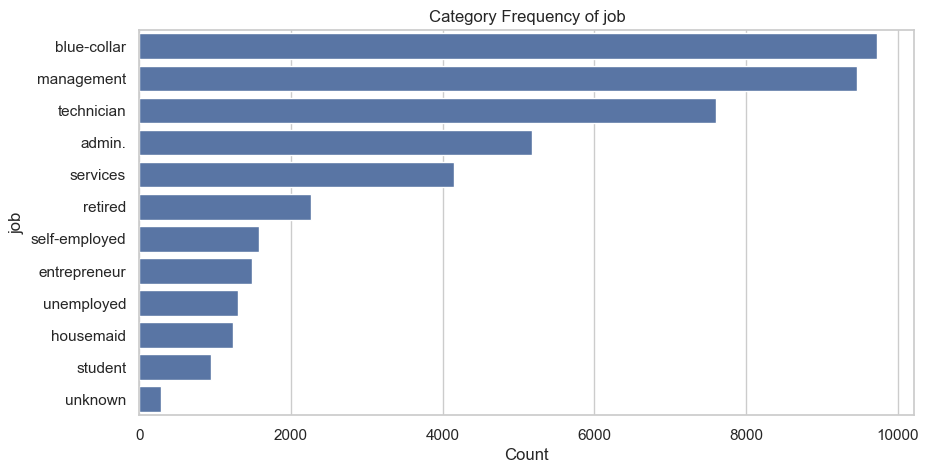

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='marital'>

Text(0.5, 1.0, 'Category Frequency of marital')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'marital')

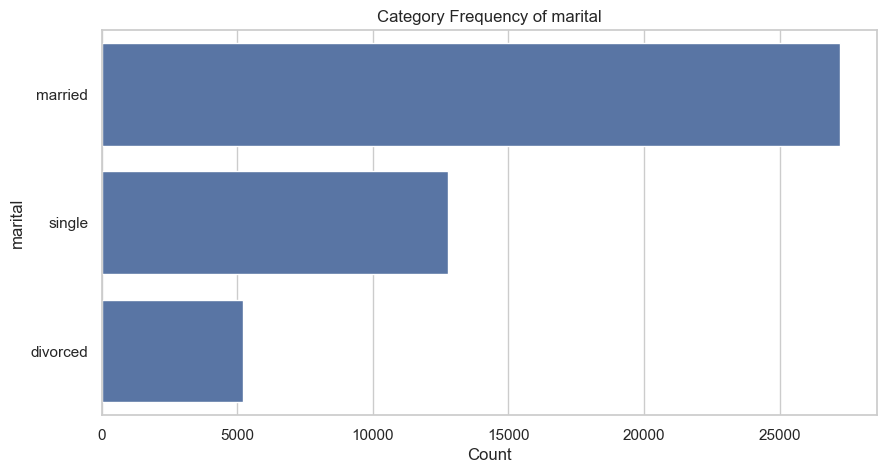

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='education'>

Text(0.5, 1.0, 'Category Frequency of education')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'education')

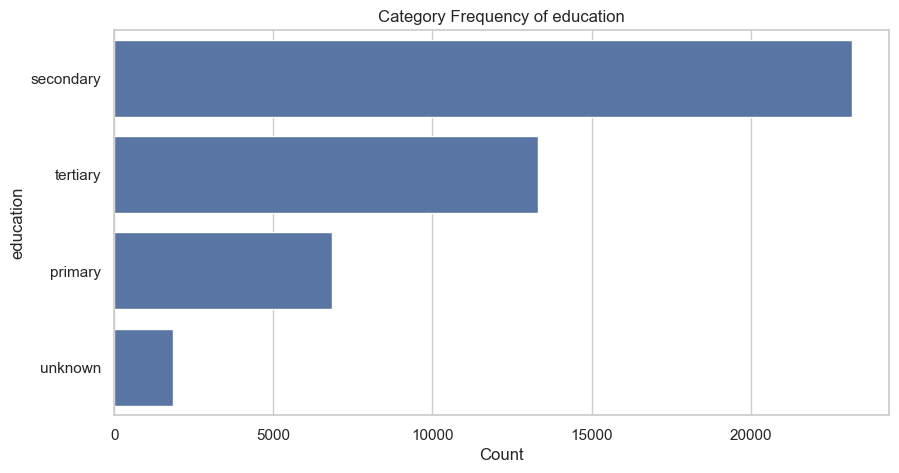

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='default'>

Text(0.5, 1.0, 'Category Frequency of default')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'default')

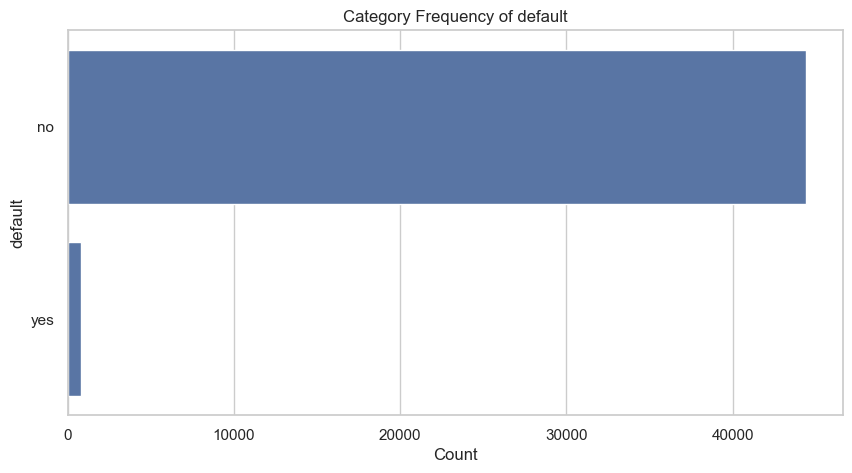

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='housing'>

Text(0.5, 1.0, 'Category Frequency of housing')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'housing')

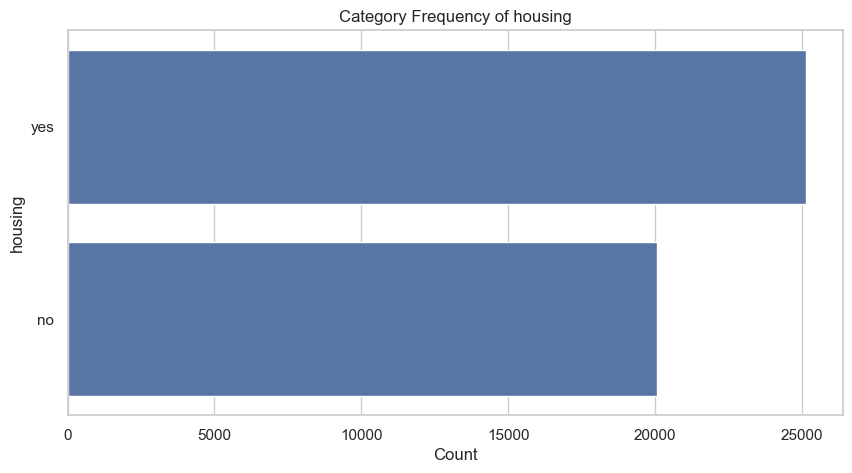

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='loan'>

Text(0.5, 1.0, 'Category Frequency of loan')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'loan')

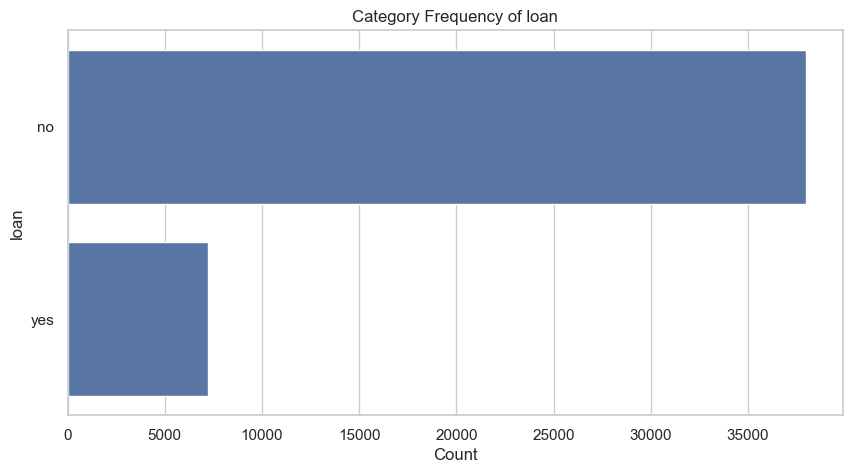

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='contact'>

Text(0.5, 1.0, 'Category Frequency of contact')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'contact')

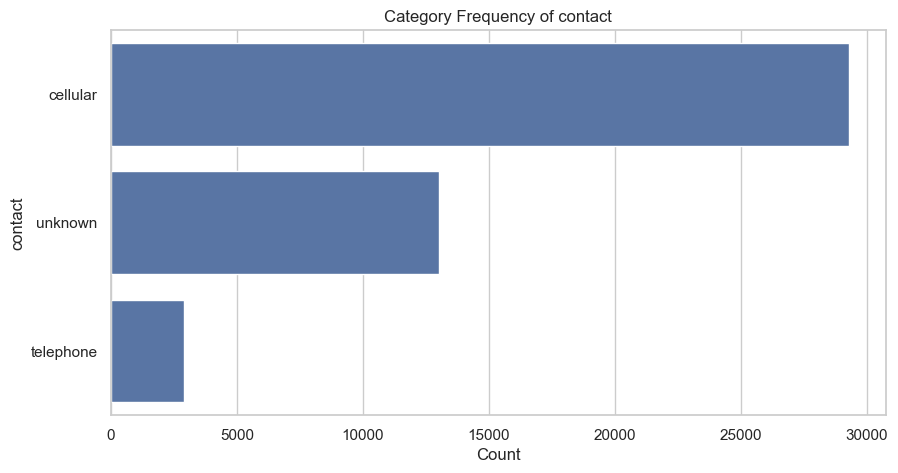

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='month'>

Text(0.5, 1.0, 'Category Frequency of month')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'month')

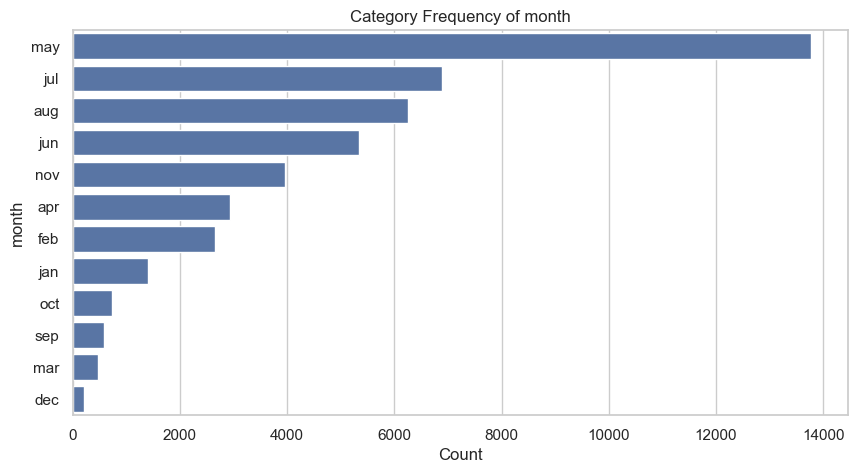

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='poutcome'>

Text(0.5, 1.0, 'Category Frequency of poutcome')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'poutcome')

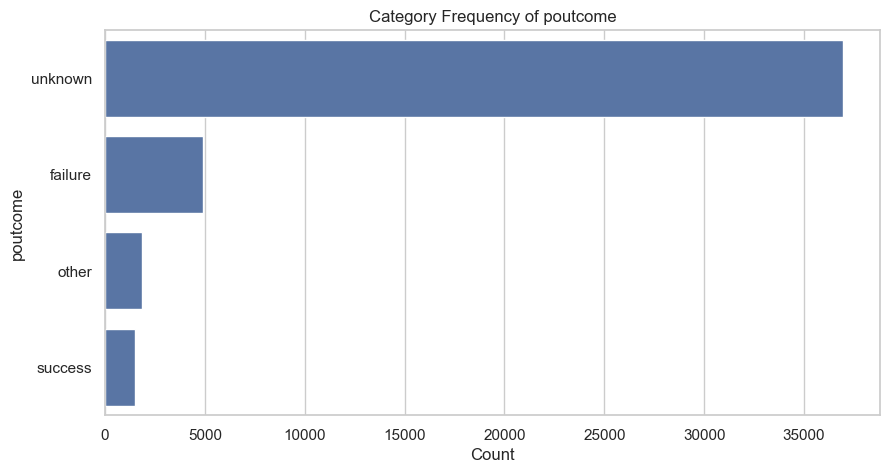

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='y'>

Text(0.5, 1.0, 'Category Frequency of y')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'y')

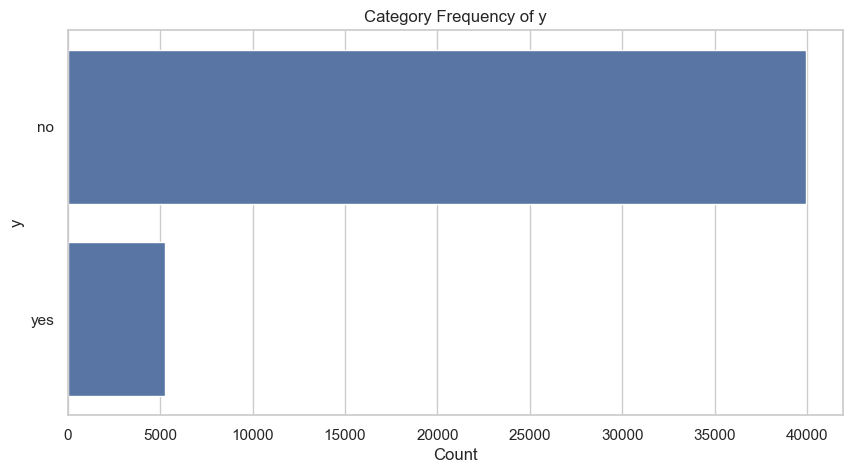

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='campaign_bucket'>

Text(0.5, 1.0, 'Category Frequency of campaign_bucket')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'campaign_bucket')

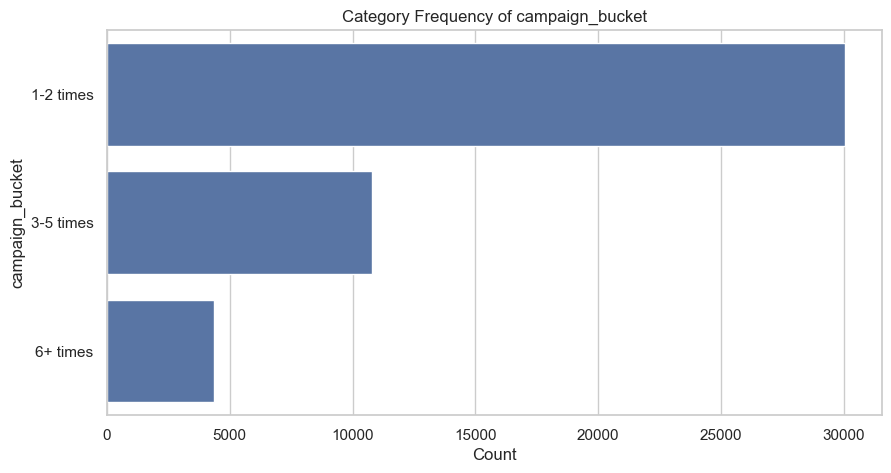

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='previous_binary'>

Text(0.5, 1.0, 'Category Frequency of previous_binary')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'previous_binary')

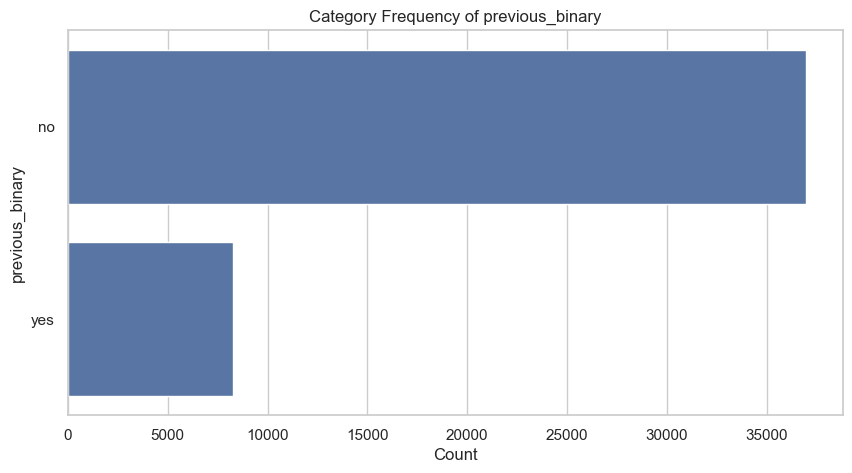

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='pdays_bucket'>

Text(0.5, 1.0, 'Category Frequency of pdays_bucket')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'pdays_bucket')

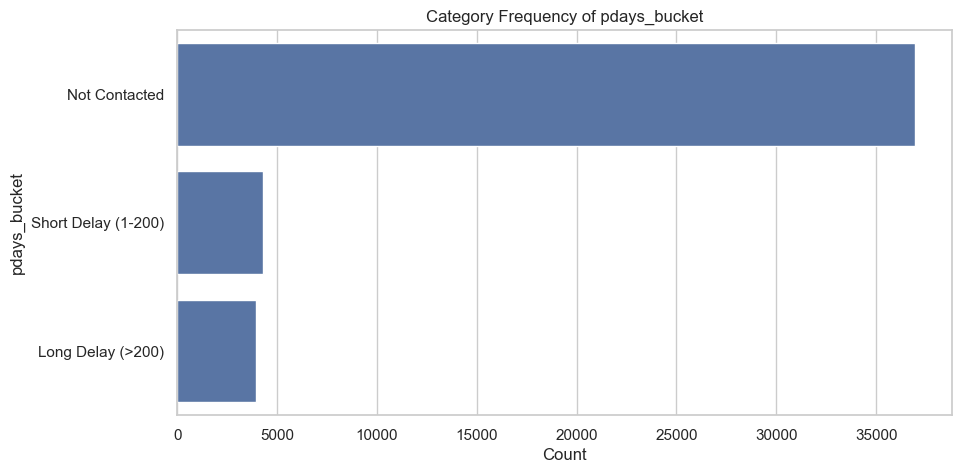

In [43]:
# Identify categorical variables
categorical_cols = bank.select_dtypes(include=["object", "category"]).columns

# Manually iterate through each categorical variable and display bar charts
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=bank[col], order=bank[col].value_counts().index)  # Plot category frequencies
    plt.title(f"Category Frequency of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.show()

<Figure size 800x500 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/1825716608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=bank[col], order=bank[col].value_counts().index, palette="viridis")


Text(9832.0, 0.0, '9732.0')

Text(9558.0, 1.0, '9458.0')

Text(7697.0, 2.0, '7597.0')

Text(5271.0, 3.0, '5171.0')

Text(4254.0, 4.0, '4154.0')

Text(2364.0, 5.0, '2264.0')

Text(1679.0, 6.0, '1579.0')

Text(1587.0, 7.0, '1487.0')

Text(1403.0, 8.0, '1303.0')

Text(1340.0, 9.0, '1240.0')

Text(1038.0, 10.0, '938.0')

Text(388.0, 11.0, '288.0')

Text(0.5, 1.0, 'Distribution of Job')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Job')

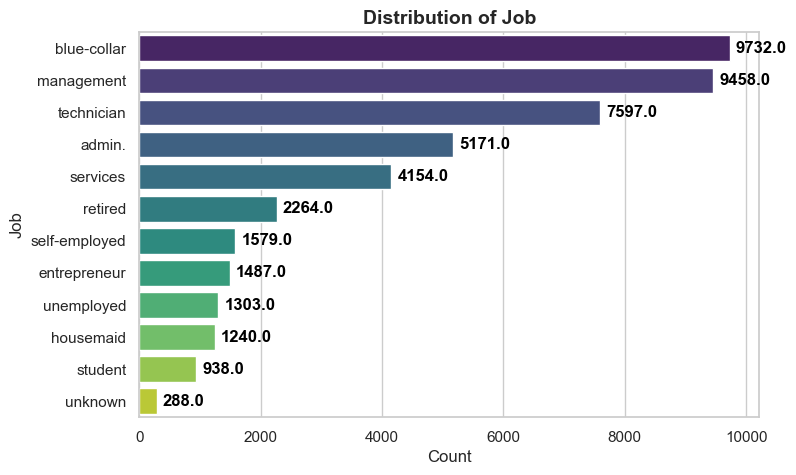

<Figure size 800x500 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/1825716608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=bank[col], order=bank[col].value_counts().index, palette="viridis")


Text(23302.0, 0.0, '23202.0')

Text(13401.0, 1.0, '13301.0')

Text(6951.0, 2.0, '6851.0')

Text(1957.0, 3.0, '1857.0')

Text(0.5, 1.0, 'Distribution of Education')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Education')

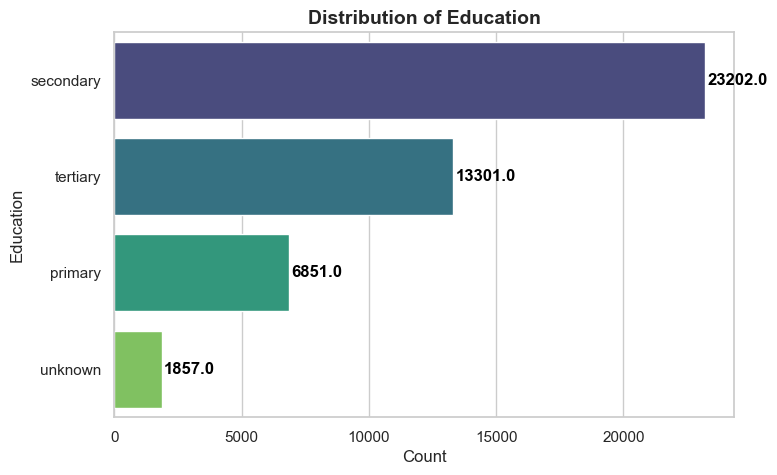

<Figure size 800x500 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/1825716608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=bank[col], order=bank[col].value_counts().index, palette="viridis")


Text(29385.0, 0.0, '29285.0')

Text(13120.0, 1.0, '13020.0')

Text(3006.0, 2.0, '2906.0')

Text(0.5, 1.0, 'Distribution of Contact')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Contact')

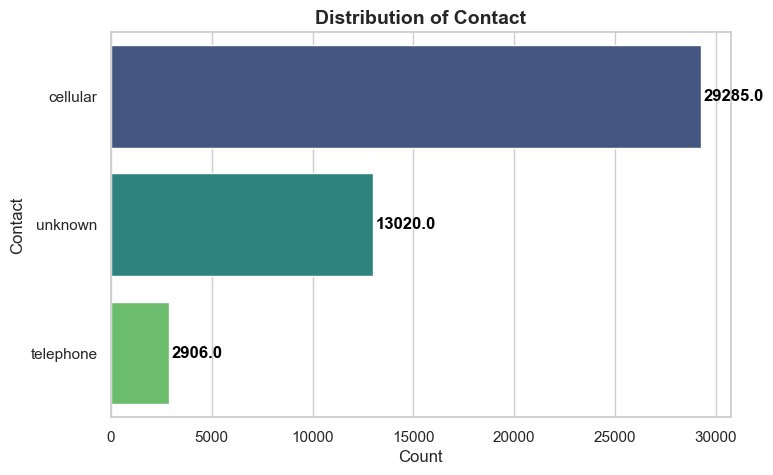

<Figure size 800x500 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/1825716608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=bank[col], order=bank[col].value_counts().index, palette="viridis")


Text(37059.0, 0.0, '36959.0')

Text(5001.0, 1.0, '4901.0')

Text(1940.0, 2.0, '1840.0')

Text(1611.0, 3.0, '1511.0')

Text(0.5, 1.0, 'Distribution of Poutcome')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Poutcome')

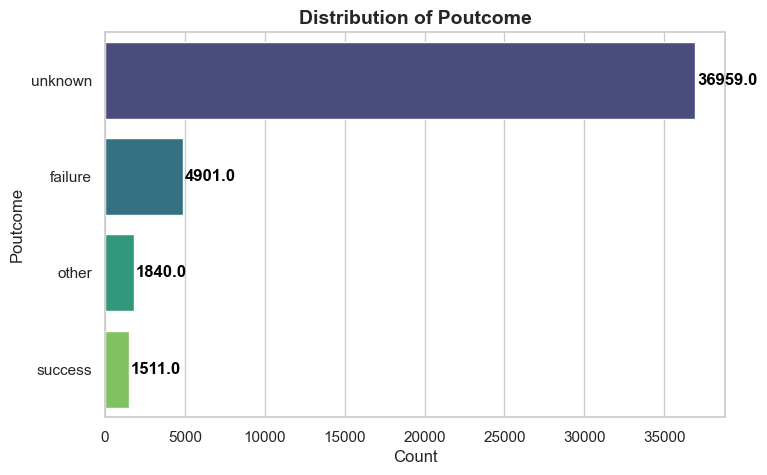

<Figure size 800x500 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/1825716608.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y=bank[col], order=bank[col].value_counts().index, palette="viridis")


Text(40022.0, 0.0, '39922.0')

Text(5389.0, 1.0, '5289.0')

Text(0.5, 1.0, 'Distribution of Y')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Y')

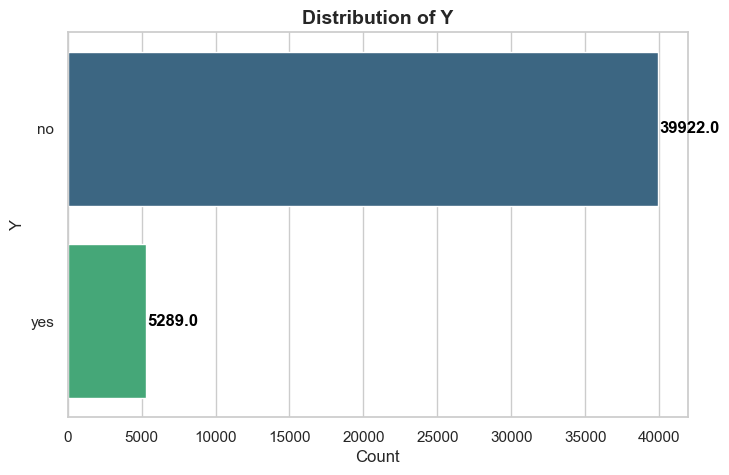

In [44]:
# Define the categorical columns to visualize
categorical_cols = ["job", "education", "contact", "poutcome","y"]

# Set style for better aesthetics
sns.set_style("whitegrid")

# Create bar charts for each categorical variable
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(y=bank[col], order=bank[col].value_counts().index, palette="viridis")
    
    # Annotate each bar with its count
    for p in ax.patches:
        ax.annotate(f"{p.get_width()}", (p.get_width() + 100, p.get_y() + p.get_height() / 2), 
                    ha="left", va="center", fontsize=12, fontweight="bold", color="black")

    plt.title(f"Distribution of {col.capitalize()}", fontsize=14, fontweight="bold")
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(col.capitalize(), fontsize=12)
    plt.show()


### 2.3 Correlation among attributes

### 2.3.1 Relationships Between Numerical Variables

<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features (Excluding Target Variable y)')

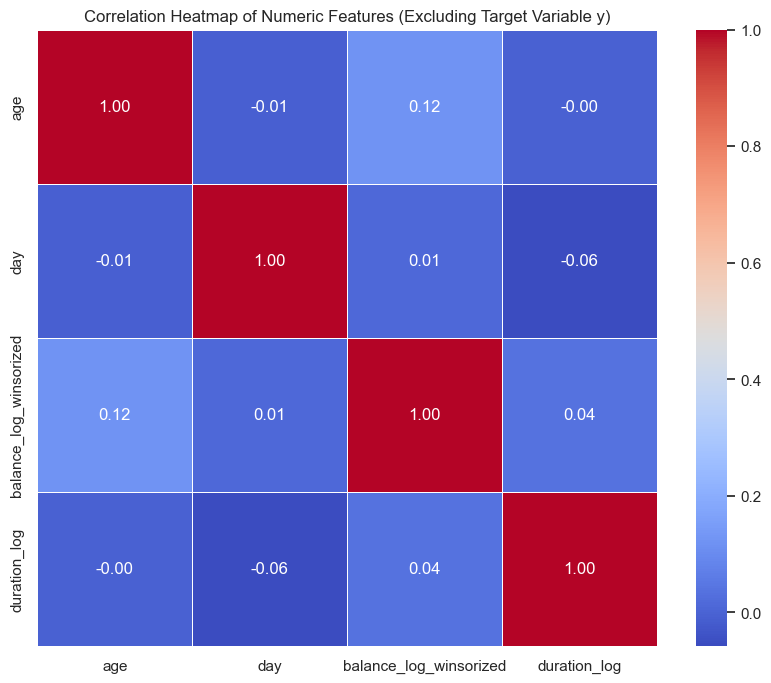

In [48]:
# Select numerical variables
numeric_cols = bank.select_dtypes(include=["number"]).columns  # Select all numeric columns

# Ensure 'y' (target variable) is present before removing it to prevent errors
if "y" in numeric_cols:
    numeric_cols = numeric_cols.drop("y")

# Compute correlation matrix between numerical variables
numeric_corr = bank[numeric_cols].corr()

# Plot heatmap to visualize correlations among numerical features (excluding target variable 'y')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features (Excluding Target Variable y)")
plt.show()

### 2.3.2 Relationships Between Numerical Variables and the Target Variable

Point Biserial Correlation between Numerical Features and Target (y):

                        Correlation  P-value
duration_log                  0.343      0.0
balance_log_winsorized        0.085      0.0
age                           0.025      0.0
day                          -0.028      0.0


<Figure size 800x400 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Point Biserial Correlation with Target Variable (y)')

Text(0.5, 1.0, 'Correlation between Numerical Features and Target (y)')

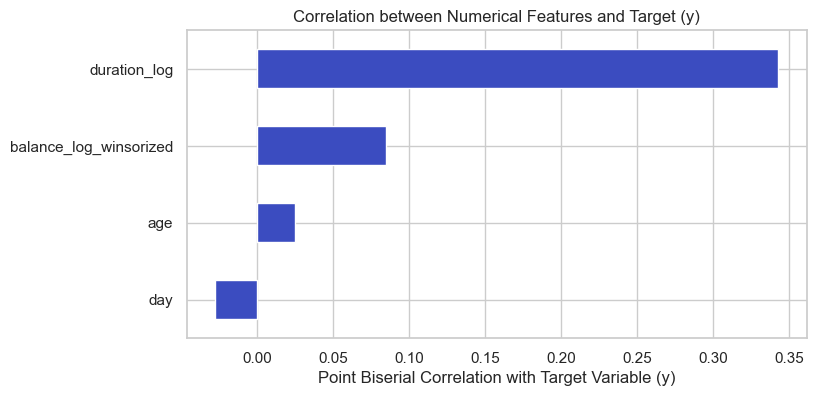

In [52]:
# Ensure the target variable 'y' is binary and exists in the dataset
target_var = "y"

# Check if 'y' is present in the dataset
if target_var not in bank.columns:
    raise KeyError(f"Target variable '{target_var}' not found in dataset. Available columns: {bank.columns}")

# Convert "yes"/"no" labels to binary (0/1)
bank[target_var] = bank[target_var].map({"yes": 1, "no": 0})  # Ensure binary classification

# Verify the conversion was successful
assert bank[target_var].nunique() == 2, "Conversion failed: Target variable is not binary (0/1)."

# Select numerical variables and remove 'y' from the list if present
numeric_cols = bank.select_dtypes(include=["number"]).columns
if target_var in numeric_cols:
    numeric_cols = numeric_cols.drop(target_var)

# Compute Point Biserial Correlation between numerical features and the target variable
corr_results = {}
for col in numeric_cols:
    corr, p_value = pointbiserialr(bank[col], bank[target_var])
    corr_results[col] = {"Correlation": round(corr, 3), "P-value": round(p_value, 5)}

# Convert results into a DataFrame and sort by correlation value
corr_df = pd.DataFrame.from_dict(corr_results, orient="index").sort_values(by="Correlation", ascending=False)

# Print correlation results
print("Point Biserial Correlation between Numerical Features and Target (y):\n")
print(corr_df)

# Visualize correlation results
plt.figure(figsize=(8, 4))
corr_df["Correlation"].sort_values().plot(kind="barh", colormap="coolwarm")
plt.xlabel("Point Biserial Correlation with Target Variable (y)")
plt.title("Correlation between Numerical Features and Target (y)")
plt.show()


### 2.3.3 Relationships Between Categorical Variables and the Target Variable

Cramér's V correlation with target variable (y):

           Variable  Cramér's V
8          poutcome    0.311663
7             month    0.260237
11     pdays_bucket    0.206230
10  previous_binary    0.167174
6           contact    0.151355
4           housing    0.139103
0               job    0.135990
9   campaign_bucket    0.073302
2         education    0.072695
5              loan    0.068091
1           marital    0.065926
3           default    0.022160


<Figure size 800x400 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/1692119678.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Cramér's V", y="Variable", data=cramers_v_df, palette="coolwarm")


<Axes: xlabel="Cramér's V", ylabel='Variable'>

Text(0.5, 0, "Cramér's V")

Text(0.5, 1.0, "Cramér's V Correlation between Categorical Features and Target (y)")

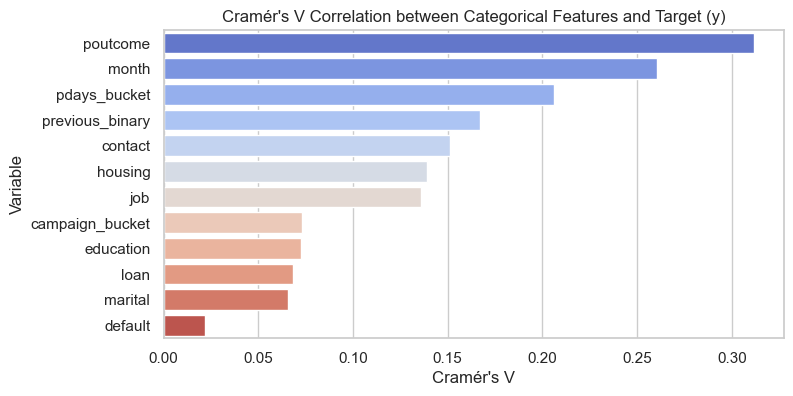

In [55]:
# Function to compute Cramér's V for categorical variables
def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]  # Compute Chi-square statistic
    n = confusion_matrix.sum().sum()  # Total number of observations
    r, k = confusion_matrix.shape  # Get the number of rows and columns
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))  # Compute Cramér's V

# Select all categorical variables
categorical_cols = bank.select_dtypes(include=["object", "category"]).columns
categorical_cols = categorical_cols.drop("y", errors="ignore")  # Exclude the target variable 'y'

# Compute Cramér's V correlation between categorical variables and the target variable 'y'
cramers_v_results = {}
for col in categorical_cols:
    confusion_matrix = pd.crosstab(bank[col], bank["y"])  # Create a contingency table
    cramers_v_results[col] = cramers_v(confusion_matrix)  # Compute Cramér's V

# Convert results into a DataFrame and sort by Cramér's V value
cramers_v_df = pd.DataFrame(cramers_v_results.items(), columns=["Variable", "Cramér's V"])
cramers_v_df = cramers_v_df.sort_values(by="Cramér's V", ascending=False)

# Print Cramér's V correlation values
print("Cramér's V correlation with target variable (y):\n")
print(cramers_v_df)

# Visualize the correlation between categorical variables and the target variable 'y'
plt.figure(figsize=(8, 4))
sns.barplot(x="Cramér's V", y="Variable", data=cramers_v_df, palette="coolwarm")
plt.xlabel("Cramér's V")
plt.title("Cramér's V Correlation between Categorical Features and Target (y)")
plt.show()

In [57]:
# Remove unnecessary columns: default
bank = bank.drop(columns=["default"])

<Figure size 1000x500 with 0 Axes>

/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/3267796187.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_subscription.index, y=month_subscription.values, palette="coolwarm")


<Axes: xlabel='month'>

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Subscription Rate (y=1)')

Text(0.5, 1.0, 'Subscription Rate by Month')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'may'),
  Text(1, 0, 'jul'),
  Text(2, 0, 'jan'),
  Text(3, 0, 'nov'),
  Text(4, 0, 'jun'),
  Text(5, 0, 'aug'),
  Text(6, 0, 'feb'),
  Text(7, 0, 'apr'),
  Text(8, 0, 'oct'),
  Text(9, 0, 'sep'),
  Text(10, 0, 'dec'),
  Text(11, 0, 'mar')])

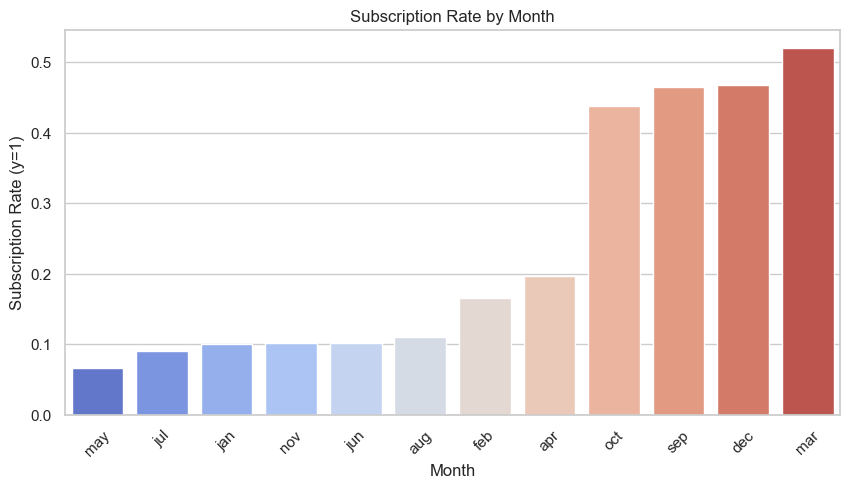

In [59]:
# Analyze the pattern of the 'month' variable: Possible seasonal effects
# Seasonal impact can be explored by creating 'is_summer' and 'is_winter' variables

# Calculate the subscription rate for each month (proportion of y=1)
month_subscription = bank.groupby("month")["y"].mean().sort_values()

# Plot a bar chart to visualize the subscription rate by month
plt.figure(figsize=(10, 5))
sns.barplot(x=month_subscription.index, y=month_subscription.values, palette="coolwarm")

# Set chart title and labels
plt.xlabel("Month")
plt.ylabel("Subscription Rate (y=1)")
plt.title("Subscription Rate by Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

In [61]:
# Define months with high subscription rates
high_subscription_months = ["mar", "sep", "oct", "dec"]

# Create a new binary variable: 1 for peak subscription season, 0 for non-peak season
bank["is_peak_season"] = bank["month"].apply(lambda x: 1 if x in high_subscription_months else 0)

# Check the new variable
print(bank[["month", "is_peak_season"]].head())

# Drop the original 'month' column after transformation
bank = bank.drop(columns=["month"])

  month  is_peak_season
0   may               0
1   may               0
2   may               0
3   may               0
4   may               0


In [63]:
bank.head()

,age,job,marital,education,housing,loan,contact,day,poutcome,y,balance_log_winsorized,duration_log,campaign_bucket,previous_binary,pdays_bucket,is_peak_season
0,58,management,married,tertiary,yes,no,unknown,5,unknown,0,9.226509,5.568345,1-2 times,no,Not Contacted,0
1,44,technician,single,secondary,yes,no,unknown,5,unknown,0,8.993303,5.023881,1-2 times,no,Not Contacted,0
2,33,entrepreneur,married,secondary,yes,yes,unknown,5,unknown,0,8.989943,4.343805,1-2 times,no,Not Contacted,0
3,47,blue-collar,married,unknown,yes,no,unknown,5,unknown,0,9.161780,4.532599,1-2 times,no,Not Contacted,0
4,33,unknown,single,unknown,no,no,unknown,5,unknown,0,8.989818,5.293305,1-2 times,no,Not Contacted,0


### 3. Prepare the data

### 3.1 Dataset suitable for logistic regression and neural network

In [68]:
# Copy the dataset
df_logistic_nn = bank.copy()

# 1. Process binary variables
binary_features = ["loan", "housing", "previous_binary"]
for col in binary_features:
    df_logistic_nn[col] = df_logistic_nn[col].map({"yes": 1, "no": 0})  # Convert categorical values to numeric

# 2. Process ordinal categorical variables (Ordinal Encoding), ensuring `"unknown"` is mapped to `0`
education_order = ["unknown", "primary", "secondary", "tertiary"]  # Map "unknown" as 0
poutcome_order = ["unknown", "failure", "other", "success"]  # Map "unknown" as 0
campaign_bucket_order = ["1-2 times", "3-5 times", "6+ times"]
pdays_bucket_order = ["Not Contacted", "Short Delay (1-200)", "Long Delay (>200)"]

ordinal_encoder = OrdinalEncoder(categories=[education_order, poutcome_order, campaign_bucket_order, pdays_bucket_order])

# Apply ordinal encoding and ensure the output is integer
df_logistic_nn[["education_encoded", "poutcome_encoded", "campaign_bucket_encoded", "pdays_bucket_encoded"]] = ordinal_encoder.fit_transform(
    df_logistic_nn[["education", "poutcome", "campaign_bucket", "pdays_bucket"]]
).astype(int)

# Drop the original categorical variables after encoding
df_logistic_nn = df_logistic_nn.drop(columns=["education", "poutcome", "campaign_bucket", "pdays_bucket"])

# 3. Process nominal categorical variables (One-Hot Encoding)
df_logistic_nn = pd.get_dummies(df_logistic_nn, columns=["job", "marital", "contact"], drop_first=True, dtype=int)

# Check data types
print("Dataset Data Types:\n", df_logistic_nn.dtypes)

# Output processed dataset
print("Dataset for Logistic Regression & Neural Networks (Standardized Selected Numeric Variables Only):")
df_logistic_nn.head()

# Check for missing values
missing_values = df_logistic_nn.isna().sum()
print("Missing Values in Each Column:\n", missing_values)

Dataset Data Types:
 age                          int64
housing                      int64
loan                         int64
day                          int64
y                            int64
balance_log_winsorized     float64
duration_log               float64
previous_binary              int64
is_peak_season               int64
education_encoded            int64
poutcome_encoded             int64
campaign_bucket_encoded      int64
pdays_bucket_encoded         int64
job_blue-collar              int64
job_entrepreneur             int64
job_housemaid                int64
job_management               int64
job_retired                  int64
job_self-employed            int64
job_services                 int64
job_student                  int64
job_technician               int64
job_unemployed               int64
job_unknown                  int64
marital_married              int64
marital_single               int64
contact_telephone            int64
contact_unknown              int64

,age,housing,loan,day,y,balance_log_winsorized,duration_log,previous_binary,is_peak_season,education_encoded,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,contact_telephone,contact_unknown
0,58,1,0,5,0,9.226509,5.568345,0,0,3,...,0,0,0,0,0,0,1,0,0,1
1,44,1,0,5,0,8.993303,5.023881,0,0,2,...,0,0,0,1,0,0,0,1,0,1
2,33,1,1,5,0,8.989943,4.343805,0,0,2,...,0,0,0,0,0,0,1,0,0,1
3,47,1,0,5,0,9.161780,4.532599,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,33,0,0,5,0,8.989818,5.293305,0,0,0,...,0,0,0,0,0,1,0,1,0,1


Missing Values in Each Column:
 age                        0
housing                    0
loan                       0
day                        0
y                          0
balance_log_winsorized     0
duration_log               0
previous_binary            0
is_peak_season             0
education_encoded          0
poutcome_encoded           0
campaign_bucket_encoded    0
pdays_bucket_encoded       0
job_blue-collar            0
job_entrepreneur           0
job_housemaid              0
job_management             0
job_retired                0
job_self-employed          0
job_services               0
job_student                0
job_technician             0
job_unemployed             0
job_unknown                0
marital_married            0
marital_single             0
contact_telephone          0
contact_unknown            0
dtype: int64


### 3.2 Dataset suitable for decision tree and random forest

In [71]:
# Copy the dataset
df_tree_models = bank.copy()

# 1. Process binary variables
binary_features = ["loan", "housing", "previous_binary"]
for col in binary_features:
    df_tree_models[col] = df_tree_models[col].map({"yes": 1, "no": 0})  # Convert categorical values to numeric

# 2. Process ordinal categorical variables (Ordinal Encoding), ensuring `"unknown"` is mapped to `0`
education_order = ["unknown", "primary", "secondary", "tertiary"]  # Map "unknown" as 0
poutcome_order = ["unknown", "failure", "other", "success"]  # Map "unknown" as 0
campaign_bucket_order = ["1-2 times", "3-5 times", "6+ times"]
pdays_bucket_order = ["Not Contacted", "Short Delay (1-200)", "Long Delay (>200)"]

ordinal_encoder = OrdinalEncoder(categories=[education_order, poutcome_order, campaign_bucket_order, pdays_bucket_order])

# Apply ordinal encoding and ensure the output is integer
df_tree_models[["education_encoded", "poutcome_encoded", "campaign_bucket_encoded", "pdays_bucket_encoded"]] = ordinal_encoder.fit_transform(
    df_tree_models[["education", "poutcome", "campaign_bucket", "pdays_bucket"]]
).astype(int)

# Drop the original categorical variables after encoding
df_tree_models = df_tree_models.drop(columns=["education", "poutcome", "campaign_bucket", "pdays_bucket"])

# 3. Process nominal categorical variables (Label Encoding)
categorical_features = ["job", "marital", "contact"]
for col in categorical_features:
    le = LabelEncoder()
    df_tree_models[col] = le.fit_transform(df_tree_models[col])

# Check data types
print("Dataset Data Types:\n", df_tree_models.dtypes)

# Output processed dataset
print("Dataset for Decision Tree & Random Forest:")
df_tree_models.head()

# Check for missing values
missing_values = df_tree_models.isna().sum()
print("Missing Values in Each Column:\n", missing_values)

Dataset Data Types:
 age                          int64
job                          int64
marital                      int64
housing                      int64
loan                         int64
contact                      int64
day                          int64
y                            int64
balance_log_winsorized     float64
duration_log               float64
previous_binary              int64
is_peak_season               int64
education_encoded            int64
poutcome_encoded             int64
campaign_bucket_encoded      int64
pdays_bucket_encoded         int64
dtype: object
Dataset for Decision Tree & Random Forest:


,age,job,marital,housing,loan,contact,day,y,balance_log_winsorized,duration_log,previous_binary,is_peak_season,education_encoded,poutcome_encoded,campaign_bucket_encoded,pdays_bucket_encoded
0,58,4,1,1,0,2,5,0,9.226509,5.568345,0,0,3,0,0,0
1,44,9,2,1,0,2,5,0,8.993303,5.023881,0,0,2,0,0,0
2,33,2,1,1,1,2,5,0,8.989943,4.343805,0,0,2,0,0,0
3,47,1,1,1,0,2,5,0,9.161780,4.532599,0,0,0,0,0,0
4,33,11,2,0,0,2,5,0,8.989818,5.293305,0,0,0,0,0,0


Missing Values in Each Column:
 age                        0
job                        0
marital                    0
housing                    0
loan                       0
contact                    0
day                        0
y                          0
balance_log_winsorized     0
duration_log               0
previous_binary            0
is_peak_season             0
education_encoded          0
poutcome_encoded           0
campaign_bucket_encoded    0
pdays_bucket_encoded       0
dtype: int64


### 3.2 Training and testing set

In [74]:
# Logistic Regression & Neural Network Dataset
X_nn = df_logistic_nn.drop(columns=["y"])  # Features for Logistic Regression & Neural Network
y_nn = df_logistic_nn["y"]  # Target variable

# Decision Tree & Random Forest Dataset
X_tree = df_tree_models.drop(columns=["y"])  # Features for Decision Tree & Random Forest
y_tree = df_tree_models["y"]  # Target variable

# Initialize StratifiedShuffleSplit (n_splits=1 means splitting once, test_size=20%)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform stratified sampling - Logistic Regression & Neural Network
for train_idx, test_idx in sss.split(X_nn, y_nn):
    X_train_nn, X_test_nn = X_nn.iloc[train_idx], X_nn.iloc[test_idx]
    y_train_nn, y_test_nn = y_nn.iloc[train_idx], y_nn.iloc[test_idx]

# Perform stratified sampling - Decision Tree & Random Forest
for train_idx, test_idx in sss.split(X_tree, y_tree):
    X_train_tree, X_test_tree = X_tree.iloc[train_idx], X_tree.iloc[test_idx]
    y_train_tree, y_test_tree = y_tree.iloc[train_idx], y_tree.iloc[test_idx]

# Check class distribution
print("Logistic Regression & Neural Network Dataset:")
print("Training set class distribution:\n", y_train_nn.value_counts(normalize=True))
print("Testing set class distribution:\n", y_test_nn.value_counts(normalize=True))

print("\nDecision Tree & Random Forest Dataset:")
print("Training set class distribution:\n", y_train_tree.value_counts(normalize=True))
print("Testing set class distribution:\n", y_test_tree.value_counts(normalize=True))

Logistic Regression & Neural Network Dataset:
Training set class distribution:
 y
0    0.883018
1    0.116982
Name: proportion, dtype: float64
Testing set class distribution:
 y
0    0.883003
1    0.116997
Name: proportion, dtype: float64

Decision Tree & Random Forest Dataset:
Training set class distribution:
 y
0    0.883018
1    0.116982
Name: proportion, dtype: float64
Testing set class distribution:
 y
0    0.883003
1    0.116997
Name: proportion, dtype: float64


### 3.3 Further standardization for logistic regression and neural network

In [76]:
# Standardize Selected Numeric Variables**
scaler = StandardScaler()

# Specify numerical columns to standardize for Logistic regression and neural network dataset
numeric_cols_to_standardize = ["balance_log_winsorized", "duration_log"]
X_train_nn[numeric_cols_to_standardize] = scaler.fit_transform(X_train_nn[numeric_cols_to_standardize])
X_test_nn[numeric_cols_to_standardize] = scaler.transform(X_test_nn[numeric_cols_to_standardize])


/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/744921950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_nn[numeric_cols_to_standardize] = scaler.fit_transform(X_train_nn[numeric_cols_to_standardize])
/var/folders/8z/fwv9r5t94llf9ww6m5413r3m0000gn/T/ipykernel_28494/744921950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_nn[numeric_cols_to_standardize] = scaler.transform(X_test_nn[numeric_cols_to_standardize])


### 4. Train Models

### 4.1 Logistic regression and neural network

Logistic Regression - F1 Score: 0.5073 ± 0.0079, AUC-PR: 0.4942 ± 0.0110, Precision: 0.4072 ± 0.0081, Recall: 0.6727 ± 0.0101


Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('feature_selection', SelectKBest()),
                ('classifier', LogisticRegression())])

Neural Network - F1 Score: 0.5259 ± 0.0095, AUC-PR: 0.5086 ± 0.0115, Precision: 0.4128 ± 0.0085, Recall: 0.7246 ± 0.0176


Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('feature_selection', SelectKBest()),
                ('classifier', MLPClassifier(max_iter=500))])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn


Cross-Validation Results:
                     F1-score (mean)  F1-score (std)  AUC-PR (mean)  \
Logistic Regression         0.507254         0.00790       0.494179   
Neural Network              0.525858         0.00954       0.508631   

                     AUC-PR (std)  Precision (mean)  Precision (std)  \
Logistic Regression      0.011032          0.407197         0.008067   
Neural Network           0.011489          0.412760         0.008504   

                     Recall (mean)  Recall (std)  
Logistic Regression       0.672653      0.010086  
Neural Network            0.724649      0.017578  


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top Features for Logistic Regression')

Text(0, 0.5, 'Importance Score')

Text(0.5, 0, 'Feature Names')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'duration_log'),
  Text(1, 0, 'contact_unknown'),
  Text(2, 0, 'loan'),
  Text(3, 0, 'housing'),
  Text(4, 0, 'job_services'),
  Text(5, 0, 'poutcome_encoded'),
  Text(6, 0, 'previous_binary'),
  Text(7, 0, 'job_blue-collar'),
  Text(8, 0, 'campaign_bucket_encoded'),
  Text(9, 0, 'marital_married')])

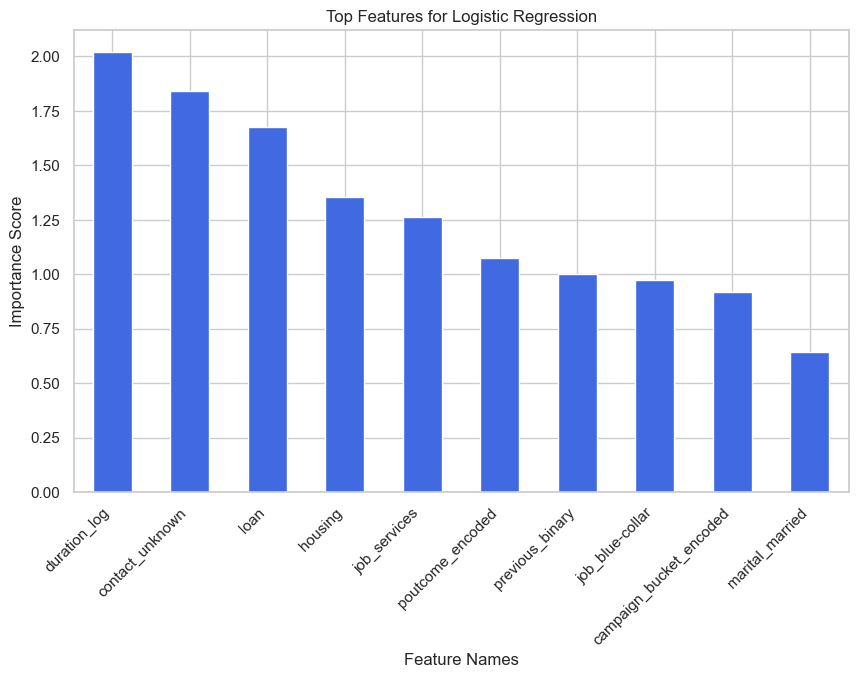

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top Features for Neural Network')

Text(0, 0.5, 'Importance Score')

Text(0.5, 0, 'Feature Names')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'duration_log'),
  Text(1, 0, 'poutcome_encoded'),
  Text(2, 0, 'housing'),
  Text(3, 0, 'contact_unknown'),
  Text(4, 0, 'loan'),
  Text(5, 0, 'campaign_bucket_encoded'),
  Text(6, 0, 'previous_binary'),
  Text(7, 0, 'job_blue-collar'),
  Text(8, 0, 'marital_married'),
  Text(9, 0, 'job_services')])

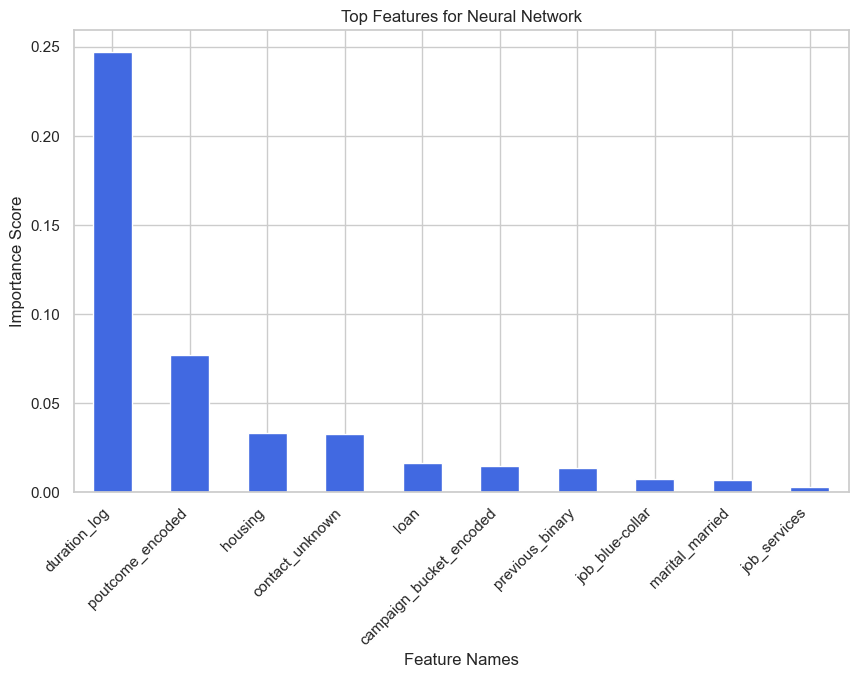

In [80]:
# Perform 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Models for Evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "Neural Network": MLPClassifier(max_iter=500)
}

# Initialize Storage for Model Results and Feature Importances
model_results = {}
feature_importances = {}

# Define Evaluation Metrics (Computed as Cross-Validation Means)
scoring = {
    "F1": "f1",
    "AUC-PR": "average_precision",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score)
}

# Iterate Through Each Model
for name, model in models.items():
    # Use ImbPipeline to allow SMOTE
    pipeline = ImbPipeline([
        ("smote", SMOTE(sampling_strategy=0.7, random_state=42)),  
        ("feature_selection", SelectKBest(f_classif, k=10)),  # Select Top 10 Features
        ("classifier", model)
    ])
    
    # Perform Cross-Validation and Evaluate Metrics Across Folds
    scores = cross_validate(pipeline, X_train_nn, y_train_nn, cv=cv, scoring=scoring, return_train_score=False)

    # Compute Mean and Standard Deviation for Each Metric
    f1_mean, f1_std = scores["test_F1"].mean(), scores["test_F1"].std()
    auc_pr_mean, auc_pr_std = scores["test_AUC-PR"].mean(), scores["test_AUC-PR"].std()
    precision_mean, precision_std = scores["test_Precision"].mean(), scores["test_Precision"].std()
    recall_mean, recall_std = scores["test_Recall"].mean(), scores["test_Recall"].std()

    # Store Model Performance Results
    model_results[name] = {
        "F1-score (mean)": f1_mean, "F1-score (std)": f1_std,
        "AUC-PR (mean)": auc_pr_mean, "AUC-PR (std)": auc_pr_std,
        "Precision (mean)": precision_mean, "Precision (std)": precision_std,
        "Recall (mean)": recall_mean, "Recall (std)": recall_std
    }

    # Print Mean and Standard Deviation for Each Model
    print(f"{name} - F1 Score: {f1_mean:.4f} ± {f1_std:.4f}, AUC-PR: {auc_pr_mean:.4f} ± {auc_pr_std:.4f}, "
          f"Precision: {precision_mean:.4f} ± {precision_std:.4f}, Recall: {recall_mean:.4f} ± {recall_std:.4f}")

    # Train the pipeline to extract feature importance
    pipeline.fit(X_train_nn, y_train_nn)
    selected_feature_mask = pipeline.named_steps["feature_selection"].get_support()  # Identify selected features
    selected_features = np.array(X_train_nn.columns)[selected_feature_mask]  # Retrieve feature names

    # Compute Feature Importance
    if isinstance(model, LogisticRegression):
        # Feature Importance for Logistic Regression (Absolute Coefficients)
        importance = np.abs(pipeline.named_steps["classifier"].coef_).flatten()  # Extract absolute coefficient values
        feature_importances[name] = pd.Series(importance, index=selected_features).sort_values(ascending=False)

    elif isinstance(model, MLPClassifier):
        # Feature Importance for Neural Network Using Permutation Importance
        perm_importance = permutation_importance(
            pipeline.named_steps["classifier"], X_train_nn[selected_features], y_train_nn,
            scoring="f1", n_repeats=10, random_state=42
        )
        feature_importances[name] = pd.Series(perm_importance.importances_mean, index=selected_features).sort_values(ascending=False)

# Convert Results to DataFrame for Better Visualization
df_results = pd.DataFrame(model_results).T

# Display Cross-Validation Results
print("\nCross-Validation Results:")
print(df_results)

# Visualize Feature Importance for Each Model
for model_name, importance in feature_importances.items():
    plt.figure(figsize=(10, 6))
    importance.plot(kind="bar", color="royalblue")
    plt.title(f"Top Features for {model_name}")
    plt.ylabel("Importance Score")
    plt.xlabel("Feature Names")
    plt.xticks(rotation=45, ha="right")
    plt.show()





### 4.2 Decision tree and random forest

Decision Tree - F1 Score: 0.4419, AUC-PR: 0.2586, Precision: 0.3384, Recall: 0.6372


Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=1.0)),
                ('feature_selection', SelectKBest()),
                ('classifier', DecisionTreeClassifier())])

Random Forest - F1 Score: 0.4970, AUC-PR: 0.4302, Precision: 0.3831, Recall: 0.7076


Pipeline(steps=[('smote', SMOTE(random_state=42, sampling_strategy=1.0)),
                ('feature_selection', SelectKBest()),
                ('classifier', RandomForestClassifier(random_state=42))])


Best Model (Tree-Based): Random Forest with F1 Score = 0.4970


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top Features for Decision Tree')

Text(0, 0.5, 'Importance Score')

Text(0.5, 0, 'Feature Names')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'duration_log'),
  Text(1, 0, 'balance_log_winsorized'),
  Text(2, 0, 'housing'),
  Text(3, 0, 'poutcome_encoded'),
  Text(4, 0, 'contact'),
  Text(5, 0, 'campaign_bucket_encoded'),
  Text(6, 0, 'loan'),
  Text(7, 0, 'pdays_bucket_encoded'),
  Text(8, 0, 'is_peak_season'),
  Text(9, 0, 'previous_binary')])

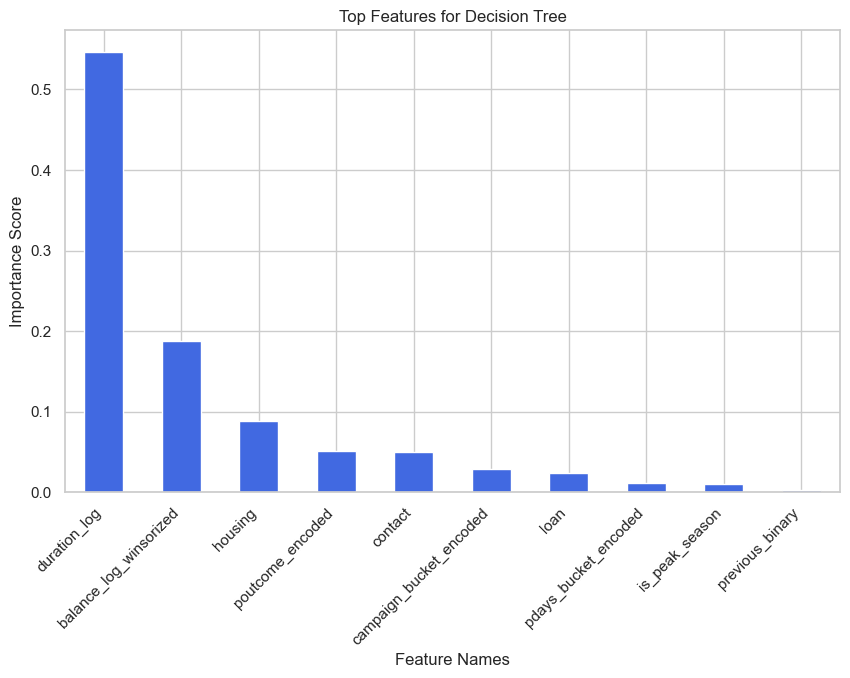

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top Features for Random Forest')

Text(0, 0.5, 'Importance Score')

Text(0.5, 0, 'Feature Names')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'duration_log'),
  Text(1, 0, 'balance_log_winsorized'),
  Text(2, 0, 'housing'),
  Text(3, 0, 'contact'),
  Text(4, 0, 'campaign_bucket_encoded'),
  Text(5, 0, 'poutcome_encoded'),
  Text(6, 0, 'loan'),
  Text(7, 0, 'pdays_bucket_encoded'),
  Text(8, 0, 'is_peak_season'),
  Text(9, 0, 'previous_binary')])

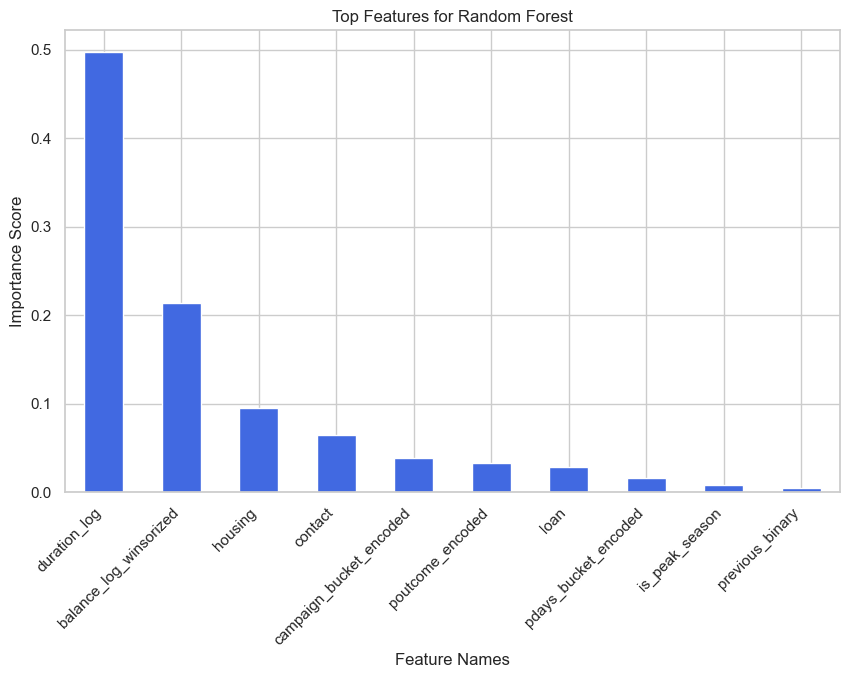

In [83]:
# Perform 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Tree-Based Models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize Storage for Model Results and Feature Importances
model_results_tree = {}
feature_importances = {}

# Define Evaluation Metrics (Computed as Cross-Validation Means)
scoring = {
    "F1": "f1",
    "AUC-PR": "average_precision",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score)
}

# Iterate Through Each Model
for name, model in models.items():
    # Use ImbPipeline instead of sklearn.pipeline.Pipeline
    pipeline = ImbPipeline([
        ("smote", SMOTE(sampling_strategy=1.0, random_state=42)), 
        ("feature_selection", SelectKBest(f_classif, k=10)),  # Select Top 10 Features
        ("classifier", model)
    ])
    
    # Perform Cross-Validation and Evaluate Metrics Across Folds
    scores = cross_validate(pipeline, X_train_tree, y_train_tree, cv=cv, scoring=scoring, return_train_score=False)

    # Compute Mean Scores for Each Metric
    f1_mean = scores["test_F1"].mean()
    auc_pr_mean = scores["test_AUC-PR"].mean()
    precision_mean = scores["test_Precision"].mean()
    recall_mean = scores["test_Recall"].mean()

    # Store Model Performance Results
    model_results_tree[name] = {
        "F1-score": f1_mean,
        "AUC-PR": auc_pr_mean,
        "Precision": precision_mean,
        "Recall": recall_mean
    }

    # Print Mean Scores for Each Model
    print(f"{name} - F1 Score: {f1_mean:.4f}, AUC-PR: {auc_pr_mean:.4f}, "
          f"Precision: {precision_mean:.4f}, Recall: {recall_mean:.4f}")

    # Train the pipeline to extract feature importance
    pipeline.fit(X_train_tree, y_train_tree)
    selected_feature_mask = pipeline.named_steps["feature_selection"].get_support()  # Identify selected features
    selected_features = np.array(X_train_tree.columns)[selected_feature_mask]  # Retrieve feature names

    if isinstance(model, (DecisionTreeClassifier, RandomForestClassifier)):
        # Extract Feature Importance for Decision Tree & Random Forest
        importance = pipeline.named_steps["classifier"].feature_importances_
        feature_importances[name] = pd.Series(importance, index=selected_features).sort_values(ascending=False)

# Select the Best Tree-Based Model Based on the Highest F1-score
best_model_name_tree = max(model_results_tree, key=lambda x: model_results_tree[x]["F1-score"])
print(f"\nBest Model (Tree-Based): {best_model_name_tree} with F1 Score = {model_results_tree[best_model_name_tree]['F1-score']:.4f}")

# Visualize Feature Importance for Each Tree-Based Model
for model_name, importance in feature_importances.items():
    plt.figure(figsize=(10, 6))
    importance.plot(kind="bar", color="royalblue")
    plt.title(f"Top Features for {model_name}")
    plt.ylabel("Importance Score")
    plt.xlabel("Feature Names")
    plt.xticks(rotation=45, ha="right")
    plt.show()

   


Model Performance Metrics:
                     F1-score  AUC-PR  Precision  Recall
Logistic Regression    0.5073  0.4942     0.4072  0.6727
Neural Network         0.5204  0.5065     0.4096  0.7140
Decision Tree          0.4425  0.2591     0.3388  0.6384
Random Forest          0.4970  0.4302     0.3831  0.7076


Text(0.5, 0.98, 'Model Performance Comparison')

<Axes: >

Text(0.5, 1.0, 'F1-score')

Text(0, 0.5, 'Score')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Neural Network'),
 Text(2, 0, 'Decision Tree'),
 Text(3, 0, 'Random Forest')]

<Axes: >

Text(0.5, 1.0, 'AUC-PR')

Text(0, 0.5, 'Score')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Neural Network'),
 Text(2, 0, 'Decision Tree'),
 Text(3, 0, 'Random Forest')]

<Axes: >

Text(0.5, 1.0, 'Precision')

Text(0, 0.5, 'Score')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Neural Network'),
 Text(2, 0, 'Decision Tree'),
 Text(3, 0, 'Random Forest')]

<Axes: >

Text(0.5, 1.0, 'Recall')

Text(0, 0.5, 'Score')

[Text(0, 0, 'Logistic Regression'),
 Text(1, 0, 'Neural Network'),
 Text(2, 0, 'Decision Tree'),
 Text(3, 0, 'Random Forest')]

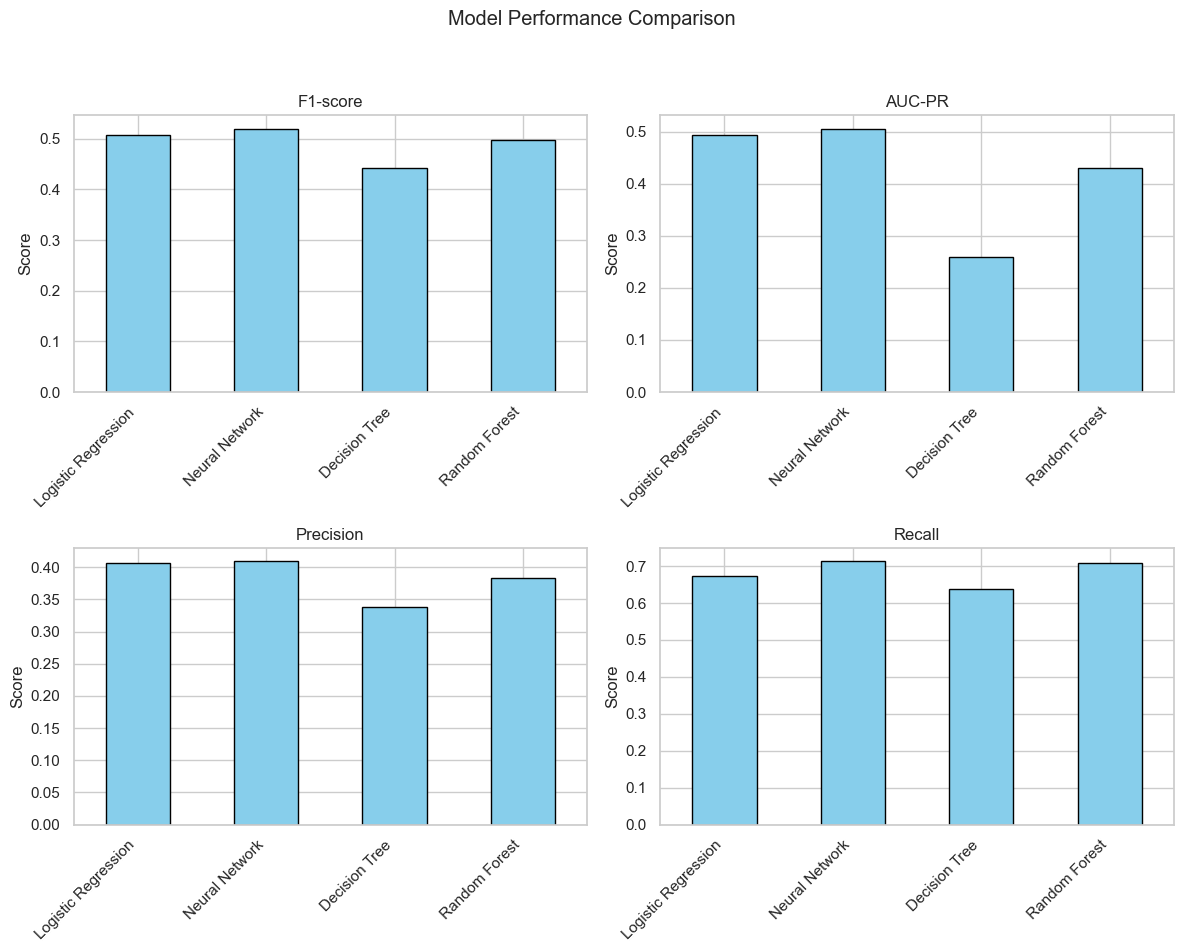

In [85]:
# Define model performance results (mean values only)
model_results = {
    "Logistic Regression": {"F1-score": 0.5073, "AUC-PR": 0.4942, "Precision": 0.4072, "Recall": 0.6727},
    "Neural Network": {"F1-score": 0.5204, "AUC-PR": 0.5065, "Precision": 0.4096, "Recall": 0.7140},
    "Decision Tree": {"F1-score": 0.4425, "AUC-PR": 0.2591, "Precision": 0.3388, "Recall": 0.6384},
    "Random Forest": {"F1-score": 0.4970, "AUC-PR": 0.4302, "Precision": 0.3831, "Recall": 0.7076}
}

# Convert results into a DataFrame
df_results = pd.DataFrame(model_results).T

# Print the table
print("Model Performance Metrics:")
print(df_results)

# Plot bar chart for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Model Performance Comparison")

metrics = ["F1-score", "AUC-PR", "Precision", "Recall"]

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]
    df_results[metric].plot(kind="bar", ax=ax, color="skyblue", edgecolor="black")
    ax.set_title(metric)
    ax.set_ylabel("Score")
    ax.set_xticklabels(df_results.index, rotation=45, ha="right")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### 5. Fine-tuning

### 5.1 Fine-tuning neural network using stacking ensemble model

In [87]:
# Define 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define Base Models
base_models = [
    ("Logistic Regression", LogisticRegression(max_iter=500, random_state=42)),
    ("Neural Network", MLPClassifier(max_iter=500, random_state=42))
]

# Define Meta-Model (Final Estimator)
meta_model = LogisticRegression(max_iter=500, random_state=42)

# Create Stacking Ensemble Model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Define Evaluation Metrics
scoring = {
    "F1": "f1",
    "AUC-PR": "average_precision",
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score)
}

# Define Preprocessing Pipeline
pipeline = ImbPipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler()),  # Standardization for continuous features
    ("smote", SMOTE(sampling_strategy=0.7, random_state=42)),  # Balance class distribution
    ("feature_selection", SelectKBest(f_classif, k=10)),  # Select top 10 features
    ("stacking", stacking_model)  # Apply stacking classifier
])

# Perform Cross-Validation and Evaluate Metrics
scores = cross_validate(pipeline, X_train_nn, y_train_nn, cv=cv, scoring=scoring, return_train_score=False)

# Compute Mean Scores for Each Metric
f1_mean = scores["test_F1"].mean()
auc_pr_mean = scores["test_AUC-PR"].mean()
precision_mean = scores["test_Precision"].mean()
recall_mean = scores["test_Recall"].mean()

# Print Model Performance Results
print(f"Stacking Model - F1 Score: {f1_mean:.4f}, AUC-PR: {auc_pr_mean:.4f}, "
      f"Precision: {precision_mean:.4f}, Recall: {recall_mean:.4f}")


Stacking Model - F1 Score: 0.5391, AUC-PR: 0.5416, Precision: 0.4238, Recall: 0.7438


### 5.2 Fine-tuning neural network using random search and early stopping and final test prediction 

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('imputer',
                                              SimpleImputer(strategy='median')),
                                             ('scaler', StandardScaler()),
                                             ('smote',
                                              SMOTE(random_state=42,
                                                    sampling_strategy=0.7)),
                                             ('feature_selection',
                                              SelectKBest()),
                                             ('classifier',
                                              MLPClassifier(early_stopping=True,
                                                            random_state=42))]),
                   n_iter=50, n_j...
                                        'classifier__alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15ea626c0>,
                                        'classifier__batch_size': [32, 64, 128],
                                        'classifier__hidden_layer_sizes': [(100,),
                                                                           (50,
                                                                            50),
                                                                           (100,
                                                                            50,
                                                                            25),
                                                                           (256,
                                                                            128,
                                                                            64)],
                                        'classifier__learning_rate_init': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15ea82b70>},
                   random_state=42, scoring='f1', verbose=2)

Best hyperparameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0054577468407475856, 'classifier__batch_size': 32, 'classifier__hidden_layer_sizes': (100,), 'classifier__learning_rate_init': 0.003307800649717358}
Best F1-score (CV): 0.5492
Best Precision (CV): 0.4165
Best Recall (CV): 0.7991
Best AUC-PR (CV): 0.3564

Test Set Evaluation:
F1-score: 0.5487
Precision: 0.4179
Recall: 0.7987
AUC-PR: 0.3573

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7985
           1       0.42      0.80      0.55      1058

    accuracy                           0.85      9043
   macro avg       0.69      0.83      0.73      9043
weighted avg       0.91      0.85      0.87      9043



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Top Features for MLPClassifier (Permutation Importance)')

Text(0, 0.5, 'Importance Score')

Text(0.5, 0, 'Feature Names')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'duration_log'),
  Text(1, 0, 'housing'),
  Text(2, 0, 'poutcome_encoded'),
  Text(3, 0, 'campaign_bucket_encoded'),
  Text(4, 0, 'contact_unknown'),
  Text(5, 0, 'pdays_bucket_encoded'),
  Text(6, 0, 'loan'),
  Text(7, 0, 'previous_binary'),
  Text(8, 0, 'is_peak_season'),
  Text(9, 0, 'job_blue-collar')])

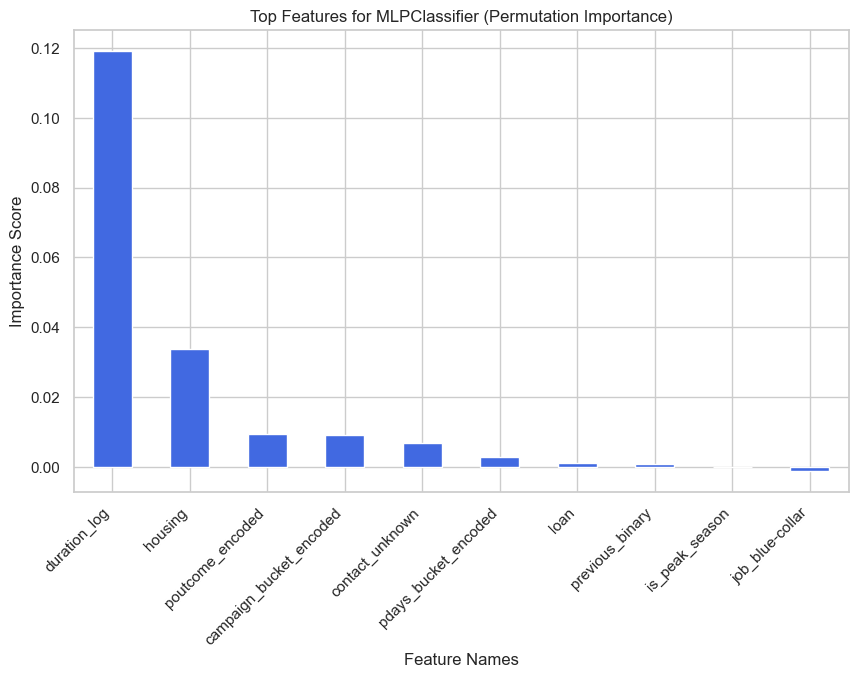

In [88]:
# Define 5-Fold Stratified Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define MLP Neural Network Classifier
mlp = MLPClassifier(
    max_iter=200,  
    early_stopping=True,  
    n_iter_no_change=10,
    random_state=42
)

# Define the hyperparameter search space for RandomizedSearchCV
param_dist = {
    'classifier__hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25), (256, 128, 64)],  
    'classifier__activation': ['relu', 'tanh', 'logistic'],  
    'classifier__learning_rate_init': uniform(0.0001, 0.01),  
    'classifier__alpha': uniform(0.0001, 0.01),  
    'classifier__batch_size': [32, 64, 128],  
}

# Build the data processing pipeline with imbalanced-learn Pipeline
pipeline = ImbPipeline([
    ("imputer", SimpleImputer(strategy="median")),  # Handle missing values
    ("scaler", StandardScaler()),  # Standardization
    ("smote", SMOTE(sampling_strategy=0.7, random_state=42)),
    ("feature_selection", SelectKBest(f_classif, k=10)),  
    ("classifier", mlp)  
])

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist, 
    scoring="f1",
    cv=cv,
    n_iter=50,  
    n_jobs=-1,  
    verbose=2,
    random_state=42
)

# Execute hyperparameter search
random_search.fit(X_train_nn, y_train_nn)

# Output the best hyperparameter combination
print(f"Best hyperparameters: {random_search.best_params_}")

# Retrieve the best model based on cross-validation results
best_cv_f1 = random_search.best_score_
best_model = random_search.best_estimator_

# Evaluate the best model on the training set
y_pred_train = best_model.predict(X_train_nn)
best_cv_precision = precision_score(y_train_nn, y_pred_train)
best_cv_recall = recall_score(y_train_nn, y_pred_train)
best_cv_auc_pr = average_precision_score(y_train_nn, y_pred_train)

# Print the best model's performance in cross-validation
print(f"Best F1-score (CV): {best_cv_f1:.4f}")
print(f"Best Precision (CV): {best_cv_precision:.4f}")
print(f"Best Recall (CV): {best_cv_recall:.4f}")
print(f"Best AUC-PR (CV): {best_cv_auc_pr:.4f}")

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test_nn)

# Compute final test set performance metrics
final_f1 = f1_score(y_test_nn, y_pred_test)
final_precision = precision_score(y_test_nn, y_pred_test)
final_recall = recall_score(y_test_nn, y_pred_test)
final_auc_pr = average_precision_score(y_test_nn, y_pred_test)

print("\nTest Set Evaluation:")
print(f"F1-score: {final_f1:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"AUC-PR: {final_auc_pr:.4f}")

# Print the full classification report
print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred_test))

# Compute feature importance using Permutation Importance
selected_features = np.array(X_train_nn.columns)[best_model.named_steps["feature_selection"].get_support()]

perm_importance = permutation_importance(
    best_model.named_steps["classifier"],  
    X_test_nn[selected_features],  
    y_test_nn,  
    scoring="f1",  
    n_repeats=10,  
    random_state=42
)

# Generate a sorted feature importance ranking
importance_series = pd.Series(perm_importance.importances_mean, index=selected_features).sort_values(ascending=False)

# Plot feature importance bar chart
plt.figure(figsize=(10, 6))
importance_series.plot(kind="bar", color="royalblue")
plt.title("Top Features for MLPClassifier (Permutation Importance)")
plt.ylabel("Importance Score")
plt.xlabel("Feature Names")
plt.xticks(rotation=45, ha="right")
plt.show()


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

Text(0.5, 1.0, 'Training Loss Curve for Neural Network')

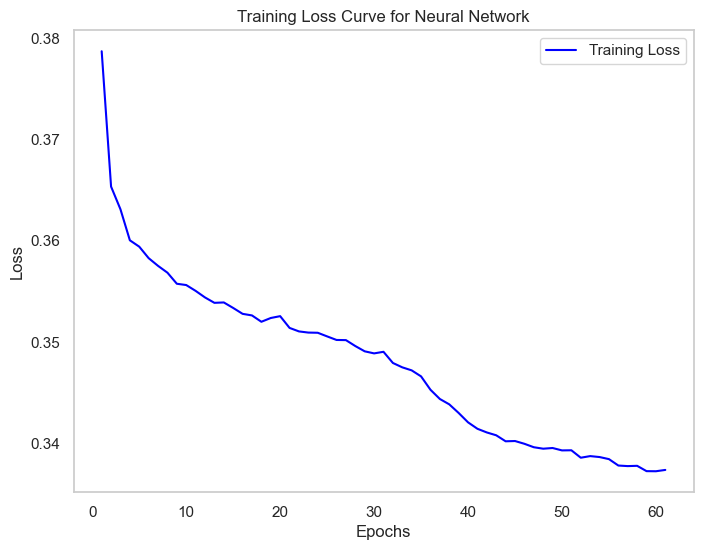

In [89]:
# Extract loss curves from the trained model
train_loss = best_model.named_steps["classifier"].loss_curve_

# Plot the loss curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(train_loss) + 1), train_loss, label="Training Loss", color="blue")

# Set plot labels and title
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve for Neural Network")
plt.legend()
plt.grid()

# Show the plot
plt.show()


### 5.3 Adjusting the optimal threshold and make final prediction

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('feature_selection', SelectKBest()),
                ('classifier',
                 MLPClassifier(early_stopping=True, random_state=42))])


Optimal Threshold: 0.7367
F1-score: 0.5595
Precision: 0.5595
Recall: 0.5595
AUC-PR: 0.5569

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7985
           1       0.56      0.56      0.56      1058

    accuracy                           0.90      9043
   macro avg       0.75      0.75      0.75      9043
weighted avg       0.90      0.90      0.90      9043



<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Threshold')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Precision and Recall vs. Threshold')

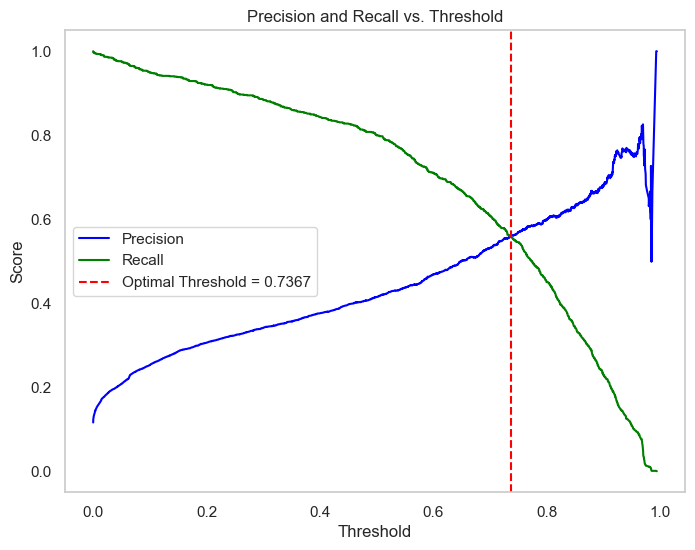

In [95]:
# Ensure the pipeline is trained before predicting
pipeline.fit(X_train_nn, y_train_nn)  # Train stacking model

# Get probability predictions from the trained stacking model
y_probs = pipeline.predict_proba(X_test_nn)[:, 1]  # Probabilities for positive class (y=1)

# Compute precision-recall values for different thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test_nn, y_probs)

# Find the threshold where precision ≈ recall
optimal_idx = np.argmin(np.abs(precisions - recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_precision = precisions[optimal_idx]
optimal_recall = recalls[optimal_idx]

# Apply the optimal threshold to make final predictions
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Compute evaluation metrics at the optimal threshold
optimal_f1 = f1_score(y_test_nn, y_pred_optimal)
optimal_precision_score = precision_score(y_test_nn, y_pred_optimal)
optimal_recall_score = recall_score(y_test_nn, y_pred_optimal)
optimal_auc_pr = average_precision_score(y_test_nn, y_probs)  # AUC-PR using probability scores

# Print Evaluation Metrics
print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"F1-score: {optimal_f1:.4f}")
print(f"Precision: {optimal_precision_score:.4f}")
print(f"Recall: {optimal_recall_score:.4f}")
print(f"AUC-PR: {optimal_auc_pr:.4f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_nn, y_pred_optimal))

# Plot Precision-Recall vs. Threshold Curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision", linestyle="-", color="blue")
plt.plot(thresholds, recalls[:-1], label="Recall", linestyle="-", color="green")

# Mark the optimal threshold
plt.axvline(x=optimal_threshold, linestyle="--", color="red", label=f"Optimal Threshold = {optimal_threshold:.4f}")

# Labels and Formatting
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs. Threshold")
plt.legend()
plt.grid()
plt.show()

